# Study of ads for the sale of apartments

We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the ** market value of real estate **. Our task is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

#### **Work plan**

**Step 1.** **Examine the data file**
1. Load data from a file into a dataframe.
2. Study the general information about the received dataframe.
3. Build a common histogram for all numerical columns of the table.

**Step 2. Data preprocessing**

1. Find and study the missing values in the columns
2. Consider the data types in each column
3. Examine unique values and duplicates
4. Find and eliminate rare values and outliers

**Step 3. Exploratory data analysis:**

1. Study the parameters of objects
2. See what factors most influence the research goals

**Step 5. Draw conclusions and make recommendations**

## Getting to know the data

1. As a result of the first attempt to read the file and display the dataframe, it turned out that tabulation is used as a column separator. Read the `real_estate_data.csv` file from the `/datasets/` folder, specifying the tab character `\t` as a separator, and save the result in the `data` dataframe.

2. The default output does not display all columns (there are too many of them), so let's add the option to display all columns

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# add option to show all columns
pd.set_option('display.max_columns', None)


In [2]:
# load dataset from file
try:
    # use tab as column separator
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    # use tab as column separator
    data = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

In [3]:
# display data for review
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### data description
- `airports_nearest` — distance to the nearest airport in meters (m)
- `balcony` — number of balconies
- `ceiling_height` - ceiling height (m)
- `cityCenters_nearest` — distance to city center (m)
- `days_exposition` - how many days the ad was placed (from publication to removal)
- `first_day_exposition` — publication date
- `floor` - floor
- `floors_total` - total floors in the house
- `is_apartment` — apartments (boolean type)
- `kitchen_area` - kitchen area in square meters (m²)
- `last_price` - price at the time of removal from publication
- `living_area` - living area in square meters (m²)
- `locality_name` - the name of the locality
- `open_plan` - free layout (boolean type)
- `parks_around3000` - number of parks within a 3 km radius
- `parks_nearest` — distance to the nearest park (m)
- `ponds_around3000` - number of ponds within a radius of 3 km
- `ponds_nearest` - distance to the nearest body of water (m)
- `rooms` - number of rooms
- `studio` — studio apartment (boolean type)
- `total_area` - total area of the apartment in square meters (m²)
- `total_images` - the number of photos of the apartment in the ad

All columns are described, their purpose is clear

#### which can be seen from a quick look at the dataset
- We want to fix camelCase for the column name `cityCenters_nearest`
- there are gaps in the data. Probably some fields are not required or not relevant - we'll need to decide what to do with gaps
- some real columns could be integer (e.g. number of balconies)
- we need to check for unique values in columns with names - there may be implicit duplicates

In [4]:
# rename cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

# look at the main data on the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### things to work with

- `airports_nearest` - there are gaps
- `balcony` - there are gaps, maybe you should change the data type to `int`
- `ceiling_height` - there are gaps
- `city_centers_nearest` - there are gaps
- `days_exposition` - there are gaps, maybe you should change the data type to `int`
- `first_day_exposition` - publication date is in string format - should be changed to `datetime`
- `floors_total` - there are several gaps, you can change the data type to `int`
- `is_apartment` - the description says that this is `bool`, but here it is a string and there are a lot of gaps, you need to look closely
- `kitchen_area` - there are gaps
- `living_area` - there are gaps
- `locality_name` - there are gaps
- `parks_around3000` - there are gaps, maybe you should change the data type to `int`
- `parks_nearest` - there are gaps
- `ponds_around3000` - there are gaps, maybe you should change the data type to `int`
- `ponds_nearest` - there are gaps

In [ ]:
# Get rid of the exponent
pd.options.display.float_format = '{:,.1f}'.format

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


- `total_area` - the total area of the apartment in square meters (m²) - here the maximum value is strongly knocked out (900 m²) - you need to look at the emissions
- `rooms` - the maximum value also stands out, although it may be the same 900 m² apartment with 19 rooms
- `ceiling_height` - ceiling height (m) - the maximum value is strongly knocked out (100 m). The minimum is also very strange - 1m - you need to look at emissions

In [ ]:
# look for empty values
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

There are a lot of empty values. We'll deal with them in a separate section.

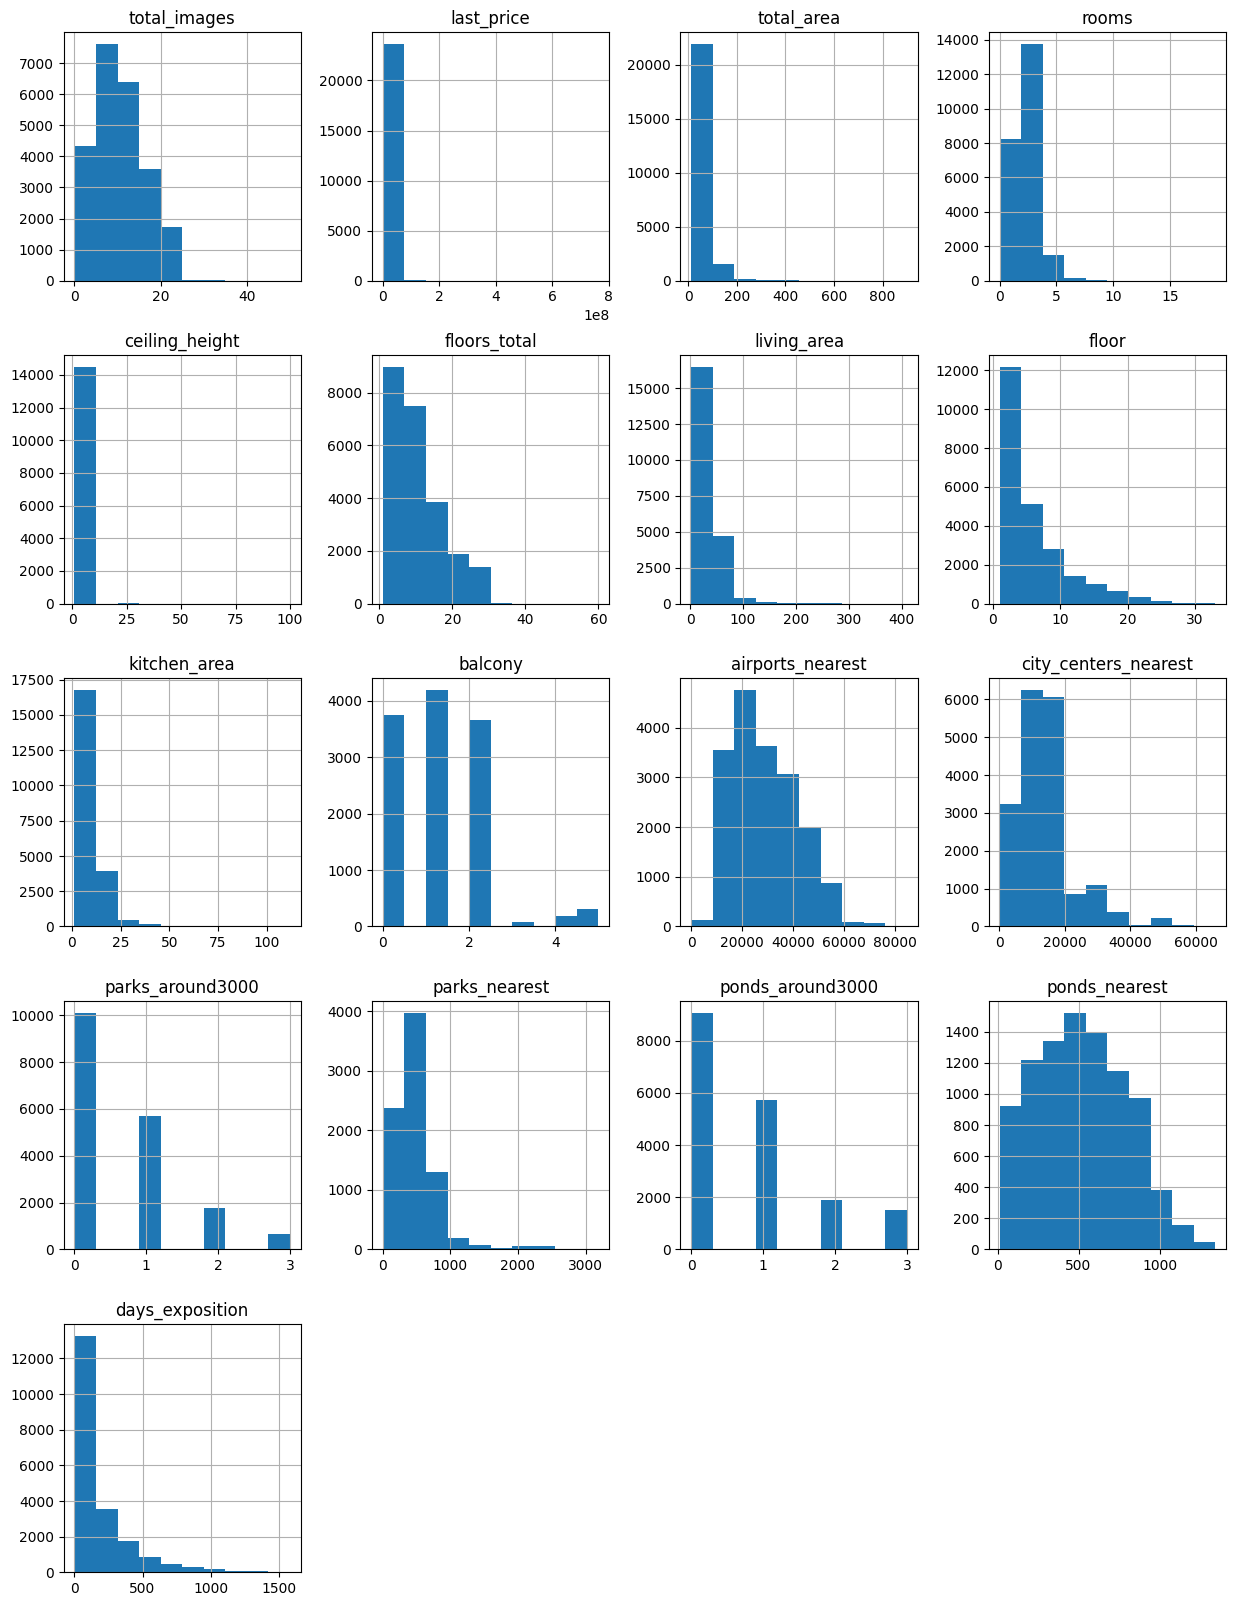

In [7]:
# Let's build histograms for the entire dataset, check the distribution of values
data.hist(figsize=(15, 20))
plt.show()

Many graphs show the presence of a small number of high values (outliers) - we will process them separately.

In [8]:
# check if there are full duplicates
data.duplicated().sum()

0

### Subtotals:
There are 23699 rows in the original dataset, described by 22 columns of parameters. Enough information in the description.
- We found a fairly large number of gaps in some parameters. They may be due to loose padding or import errors. Let's try to process them.
- Rare values are observed in the data, which bias the samples and may be erroneous, as they fall outside the expected distributions. These values will need to be corrected or removed so as not to distort the model.
- There are some errors in data types that should be corrected when generating the upload. For the purposes of the study, we will replace them

## Data preprocessing

### Missing values

We saw missing values in many columns:

- Let's try to fill in the missing values where possible. For example, if the seller did not indicate the number of balconies, then most likely there are none in his apartment. It is correct to replace such gaps with 0.
- If it is not possible to suggest a logical replacement, leave these values blank. Passes are also an important signal to take into account.

**Missing may appear:**
- The user did not want to indicate them or did not know the information
- Empty value replaces False
- Empty value replaces inapplicable/irrelevant data (like the distance to the nearest park if there are no parks nearby)

In [ ]:
# Let's redefine the columns to work with gaps
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- `ceiling_height`           9195
- `floors_total`               86
- `living_area`              1903
- `kitchen_area`             2278
- `balcony`                 11519
- `locality_name`              49
- `airports_nearest`         5542
- `city_centers_nearest`      5519
- `parks_around3000`         5518
- `parks_nearest`           15620
- `ponds_around3000`         5518
- `ponds_nearest`           14589
- `days_exposition`          3181

#### Ceiling height

In [10]:
# let's see what the entries with gaps are
data[data['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0


It seems that the height of the ceilings could simply not be specified. Let's look at the distribution.

In [11]:
data['ceiling_height'].describe()

count   14,504.0
mean         2.8
std          1.3
min          1.0
25%          2.5
50%          2.6
75%          2.8
max        100.0
Name: ceiling_height, dtype: float64

It can be seen that the data is distorted by anomalous values, but the range in which the missing values could really fall can be found.

There are two options - replace the empty values with the median, or leave empty if the median values distort the model.
For the purposes of the study, it is important to keep the influence of parameters on the price and on the number of days before the sale. Let's check these dependencies.

In [12]:
# correlation of ceiling height with the cost of the apartment
data['ceiling_height'].corr(data['last_price'])

0.08543030982842603

In [13]:
# correlation of ceiling heights with time to sale
data['ceiling_height'].corr(data['days_exposition'])

0.01909091947389998

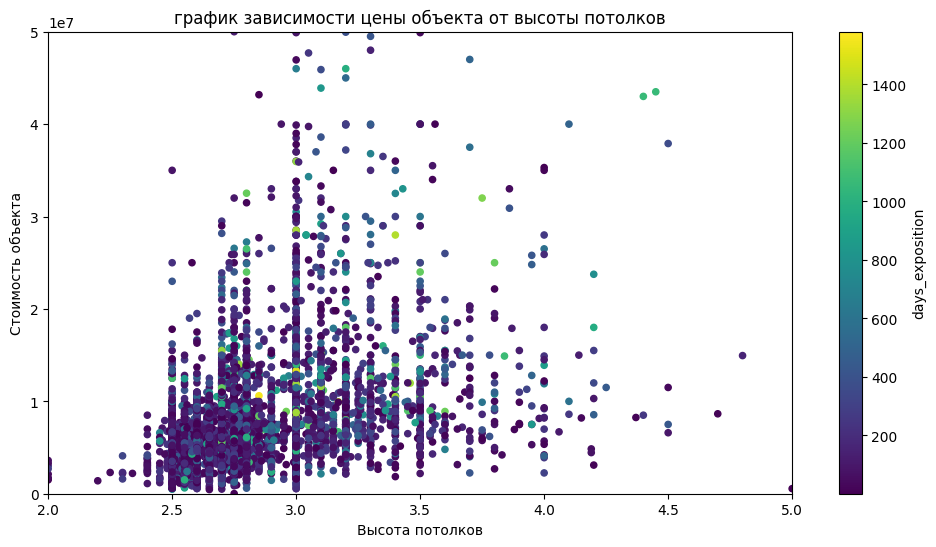

In [14]:
# graph of the dependence of the price of the object on the height of the ceilings
ax = data.plot(kind='scatter', 
               x='ceiling_height', 
               y='last_price', 
               c='days_exposition', 
               colormap='viridis', 
               title='график зависимости цены объекта от высоты потолков', 
               figsize=(12,6))
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Стоимость объекта')
plt.ylim(0, 50000000)
plt.xlim(2,5)
plt.show()

It seems that the height of the ceilings correlates weakly with the main parameters. Let's try to replace gaps with median values and compare with the original ones.

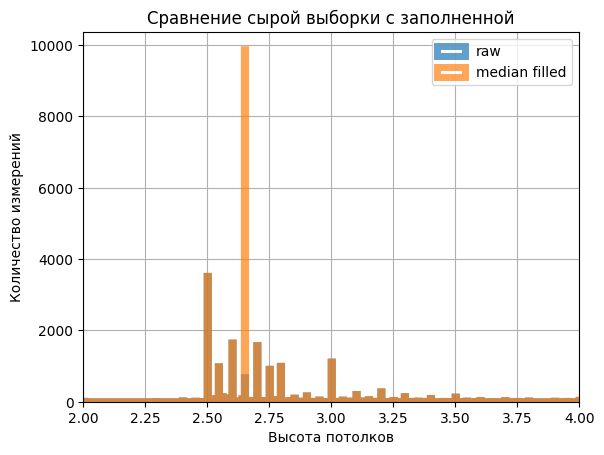

In [15]:
# create a new variable for the cleared data
test_data = data.copy()

# fill in the gaps with the median values
test_data['ceiling_height'] = test_data['ceiling_height'].fillna(test_data['ceiling_height'].median())

ax = data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 5),
    bins=1000,
    linewidth=5,
    alpha=0.7,
    label='raw',
    title='Сравнение сырой выборки с заполненной'
)
test_data.plot(
    kind='hist',
    y='ceiling_height',
    histtype='step',
    range=(0, 5),
    bins=1000,
    linewidth=5,
    alpha=0.7,
    label='median filled',
    ax=ax,
    grid=True,
    legend=True,
)
ax.set_xlabel('Высота потолков')
ax.set_ylabel('Количество измерений')
plt.xlim(2,4)
plt.show()

In [16]:
# check the impact of our actions on the correlation
test_data['ceiling_height'].corr(test_data['last_price'])

0.06442462574188172

The correlation even slightly decreased. Let's take the averaging option.

In [17]:
# create a new variable for the cleared data
clean_data = data.copy()

clean_data['ceiling_height'] = clean_data['ceiling_height'].fillna(clean_data['ceiling_height'].median())

#### Total number of floors

In [18]:
# entries with gaps
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.0",65.2,2018-10-02T00:00:00,2,NaN,NaN,30.8,4,NaN,False,False,12.0,NaN,Санкт-Петербург,"39,197.0","12,373.0",1.0,123.0,0.0,NaN,49.0
237,4,"2,438,033.0",28.1,2016-11-23T00:00:00,1,NaN,NaN,20.8,1,NaN,False,False,NaN,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,251.0
457,4,"9,788,348.0",70.8,2015-08-01T00:00:00,2,NaN,NaN,38.4,12,NaN,False,False,10.6,0.0,Санкт-Петербург,"37,364.0","8,322.0",2.0,309.0,2.0,706.0,727.0
671,4,"6,051,191.0",93.6,2017-04-06T00:00:00,3,NaN,NaN,47.1,8,NaN,False,False,16.8,0.0,Санкт-Петербург,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,123.0
1757,5,"3,600,000.0",39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"22,735.0","11,618.0",1.0,835.0,1.0,652.0,77.0


In [19]:
# number of rows with empty values
data['floors_total'].isna().sum()

86

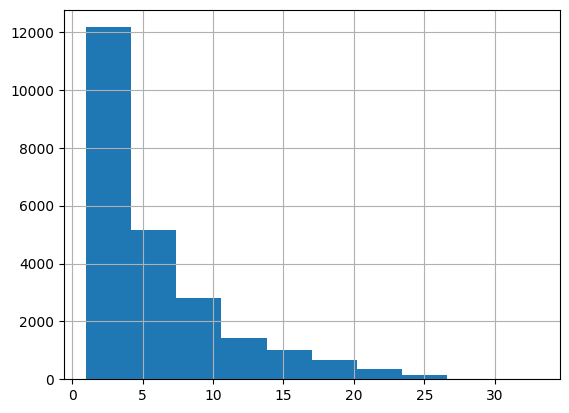

In [20]:
# histogram of nonblank values
data['floor'].hist()
plt.show()

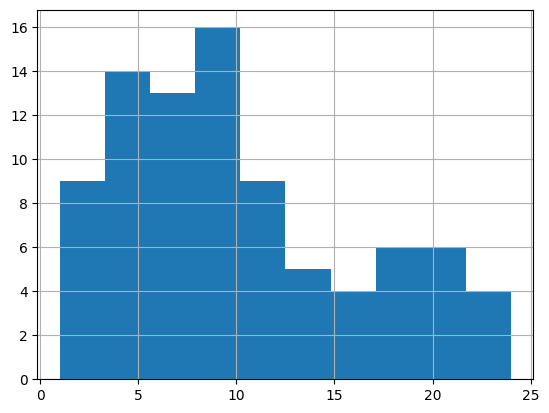

In [21]:
# histogram of empty values
data[data['floors_total'].isna()]['floor'].hist()
plt.show()

It would be possible to replace the values by category - if `floors` is from 0 to 5, then this is most likely a five-story building, from 5 to 9 - a nine-story building, etc., but there are very few lines with gaps (86). You can remove these lines from the dataset.

In [22]:
clean_data = clean_data.dropna(subset=['floors_total'])
clean_data['floors_total'].isna().sum()

0

#### Living space

In [23]:
# entries with gaps
data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
30,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,"1,990,000.0",45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",NaN


maybe people knew `total_area` but not `living_area`. Let's see if there are many gaps and if it is possible to fill them using average living area values.

In [24]:
# number of gaps in the total area
data['total_area'].isna().sum()

0

In [25]:
# number of empty values
data['living_area'].isna().sum()

1903

In [26]:
# to check, we calculate the ratio of the total and living area, taking into account the number of rooms
area_data = data.pivot_table(index='rooms', values=['total_area', 'living_area'])
area_data['area_coeff'] = area_data['living_area']/area_data['total_area']
area_data

,living_area,total_area,area_coeff
rooms,,,
0,18.9,29.3,0.6
1,17.9,37.6,0.5
2,31.7,55.9,0.6
3,47.4,77.8,0.6
4,67.0,107.6,0.6
5,100.0,161.5,0.6
6,131.0,201.5,0.6
7,163.6,265.3,0.6
8,168.7,259.2,0.7


In [27]:
# заполним пропуски средними значениями 
# перебираем каждое значение из уникальных столбца rooms
for d in clean_data['rooms'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в rooms количество комнат (d) и есть пропуски в living_area 
    clean_data.loc[(clean_data['rooms'] == d) & (clean_data['living_area'].isna()), 'living_area'] = \
    clean_data.loc[(clean_data['rooms'] == d), 'living_area'].median()
    # и записываем в них среднее значение living_area среди строк с текущим количеством комнат (d)


In [28]:
# number of empty values
clean_data['living_area'].isna().sum()

0

In [29]:
# to check, we calculate the ratio of the total and living area, taking into account the number of rooms
area_data = clean_data.pivot_table(index='rooms', values=['total_area', 'living_area'])
area_data['area_coeff'] = area_data['living_area']/area_data['total_area']
area_data

,living_area,total_area,area_coeff
rooms,,,
0,18.8,29.3,0.6
1,17.9,37.7,0.5
2,31.6,55.8,0.6
3,47.2,77.7,0.6
4,66.7,107.5,0.6
5,99.2,161.5,0.6
6,131.4,202.6,0.6
7,161.7,265.3,0.6
8,168.7,259.2,0.7


#### Apartments

In [30]:
# entries with empty values
data[data['is_apartment'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


`is_apartment` we suspected of mismatching the `bool` type, so check what values it takes and replace empty values with `False`

In [31]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [32]:
# fill in the gaps with False values
clean_data['is_apartment'] = clean_data['is_apartment'].fillna(False)

#### kitchen area

In [33]:
# entries with empty values
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
30,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,"1,990,000.0",45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",NaN
59,15,"6,300,000.0",46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,"11,125.0","14,501.0",0.0,NaN,0.0,NaN,336.0


it is impossible to offer a logical replacement, leave these values ​​blank

#### Balcony

In [34]:
# let's see what the lines with gaps are
data[data['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,False,False,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,"5,050,000.0",39.6,2017-11-16T00:00:00,1,2.7,12.0,20.3,3,NaN,False,False,8.5,NaN,Санкт-Петербург,"38,357.0","13,878.0",1.0,310.0,2.0,553.0,137.0


Let's replace the empty values with 0 (we mean that if the user did not specify the data about the balcony, then it does not exist)

In [35]:
clean_data['balcony'] = clean_data['balcony'].fillna(0)

#### Locality name

In [36]:
# entries with empty values
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,"8,600,000.0",81.7,2016-04-15T00:00:00,3,3.5,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,"23,478.0","4,258.0",0.0,NaN,0.0,NaN,147.0
2033,6,"5,398,000.0",80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,"3,351,765.0",42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,276.0
2632,2,"5,130,593.0",62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,256.0
3574,10,"4,200,000.0",46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,"27,419.0","8,127.0",0.0,NaN,1.0,603.0,45.0


If the name of the settlement is not indicated, we will not recognize it. You can replace empty values with `'unknown'` to avoid removing them altogether.

In [37]:
# replace the values of empty settlements with unknown
clean_data['locality_name'] = clean_data['locality_name'].fillna('unknown')

In [38]:
# entries with empty values
data[data['days_exposition'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
44,13,"5,350,000.0",40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,"30,471.0","11,603.0",1.0,620.0,1.0,"1,152.0",NaN
45,17,"5,200,000.0",50.6,2018-12-02T00:00:00,2,2.6,9.0,30.3,7,NaN,False,False,7.0,NaN,Санкт-Петербург,"30,011.0","12,872.0",0.0,NaN,0.0,NaN,NaN
46,17,"6,600,000.0",52.1,2019-01-31T00:00:00,2,2.6,24.0,29.7,9,NaN,False,False,8.3,2.0,Санкт-Петербург,"15,114.0","12,702.0",0.0,NaN,0.0,NaN,NaN


it is impossible to offer a logical replacement, leave these values ​​blank

#### Distances to various objects

- `airports_nearest`         5542
- `city_сenters_nearest`      5519

With airports and the center, we will not set 0 for now, as this will distort the data, but with parks and ponds, it seems that empty values may depend on empty values and 0 in adjacent categories

- `parks_around3000`         5518
- `parks_nearest`           15620
- `ponds_around3000`         5518
- `ponds_nearest`           14589



In [39]:
data[(data['parks_around3000'].isna()) | ((data['parks_around3000']) == 0.0) ].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,False,False,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0
11,9,"3,300,000.0",44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,"48,252.0","51,677.0",0.0,NaN,0.0,NaN,7.0
12,10,"3,890,000.0",54.0,2016-06-30T00:00:00,2,NaN,5.0,30.0,5,NaN,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,"4,400,000.0",36.0,2016-06-23T00:00:00,1,NaN,6.0,17.0,1,NaN,False,False,8.0,0.0,Пушкин,"20,782.0","30,759.0",0.0,NaN,1.0,96.0,203.0
17,6,"4,180,000.0",36.0,2016-09-09T00:00:00,1,NaN,17.0,16.5,7,NaN,False,False,11.0,1.0,Санкт-Петербург,"33,564.0","14,616.0",0.0,NaN,1.0,859.0,571.0


Change the empty values in `parks_around3000` and `ponds_around3000` to 0, leave `parks_nearest` empty (since it describes that there are no parks or ponds nearby)

In [40]:
# replace with 0
clean_data['parks_around3000'] = clean_data['parks_around3000'].fillna(0)
clean_data['ponds_around3000'] = clean_data['ponds_around3000'].fillna(0)

In [41]:
# check which columns we left with gaps
clean_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

#### Subtotals

Left 6 columns with gaps (was 14):
- kitchen_area 2231
- airports_nearest 5532
- city_centers_nearest 5509
- parks_nearest 15568
- ponds_nearest 14552
- days_exposition 3172

what we did:
- took the height of the ceilings as the average where they were not indicated
- deleted lines that did not indicate the height of the house (total floors), since there were very few of them
- if the number of balconies is not indicated - taken as 0
- if the name of the settlement is not specified - indicate `'unknown'`
- assumed living area equal to total area * correlation where no values were given
- accepted 0 parks and ponds nearby if they are not specified
- apartment flag accepted False if nothing is specified

### Data types

Consider the data types in each column:

- Find the columns in which you need to change the data type
- Convert the data type in the selected columns

In [42]:
# displaying a list of data types
clean_data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

- `balcony` - it is worth changing the data type to `int`
- `days_exposition` - it is worth changing the data type to `int`
- `first_day_exposition` - publication date is in string format - should be changed to `datetime`
- `floors_total` - you can change the data type to `int`
- `is_apartment` - the description says that this is a `bool`, but here it is a string
- `parks_around3000` - it is worth changing the data type to `int`
- `ponds_around3000` - it is worth changing the data type to `int`

however, for some columns, we decided to leave gaps for now, so we will only change types where it is now possible

In [43]:
# use datetime for ad appearance date
clean_data['first_day_exposition'] = pd.to_datetime(clean_data['first_day_exposition'])
# change data types in columns without gaps
clean_data.astype({'balcony' : 'int64', 'is_apartment' : 'bool', 'ponds_around3000' : 'int64', 'parks_around3000' : 'int64'}).dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Implicit duplicates

Let's examine the unique values in the column with names and eliminate implicit duplicates.

In [44]:
# output unique values of a column
clean_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [45]:
# number of unique values before cleaning
len(clean_data['locality_name'].unique())

365

“village of Ryabovo” and “urban-type settlement of Ryabovo”, “village of Telman” and “village of Telman” are designations for the same settlements. Let's replace the names in the existing column.

In [46]:
# we bring references to settlements of different types to the simple form "settlement"
clean_data['locality_name'] = (
        clean_data['locality_name']
        .replace('поселок', 'посёлок', regex=True)
        .replace('посёлок городского типа', 'посёлок', regex=True)
        .replace('городской посёлок', 'посёлок', regex=True)
    )

In [47]:
# number of unique values after cleaning
len(clean_data['locality_name'].unique())

323

Reduced the number of unique values from 365 to 323 due to implicit duplicates in the names of the villages. Similar problems were not found in villages and villages

### Outliers

Find and eliminate rare and outliers. For example, the `ceiling_height` column may contain `25 m` and `32 m` ceiling heights. It is logical to assume that these are actually real values: `2.5 m` and `3.2 m`. Let's try to process anomalies in this and other columns.
     - If the nature of the anomaly is clear and the data is indeed distorted, we will restore the correct value.
     - Otherwise, we will remove rare and outlier values.

In [48]:
# display a list of column names for enumeration
clean_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

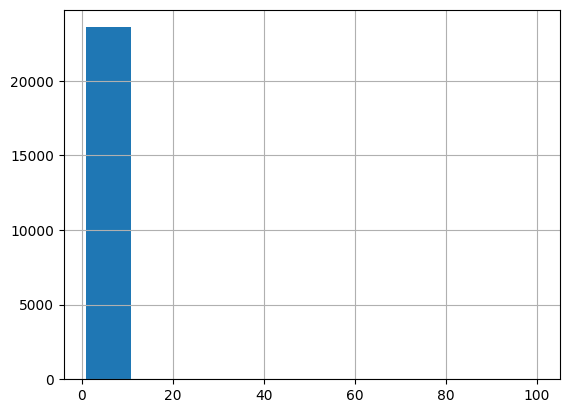

In [49]:
clean_data['ceiling_height'].hist()
plt.show()

outliers have rather high values, but it is possible to assume that it is necessary to change the order only for those that exceed the typical minimum value (from 2.4m)

In [50]:
# посмотрим на данные с высотой потолков более 23 метров
clean_data[clean_data['ceiling_height'] >= 23].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,"3,600,000.0",55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,259.0
3148,14,"2,900,000.0",75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4643,0,"4,300,000.0",45.0,2018-02-01,2,25.0,9.0,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,"12,016.0","13,256.0",1.0,658.0,1.0,331.0,181.0
4876,7,"3,000,000.0",25.0,2017-09-27,0,27.0,25.0,17.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,28.0
5076,0,"3,850,000.0",30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,"29,686.0","8,389.0",3.0,397.0,1.0,578.0,7.0


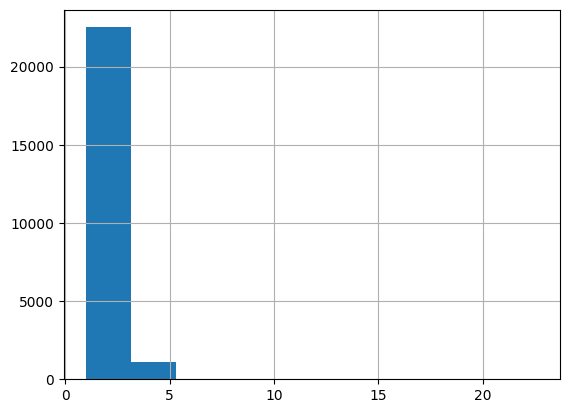

In [51]:
# уменьшим порядок для этих значений
clean_data['ceiling_height'] = (
    clean_data['ceiling_height']
    .where(clean_data['ceiling_height'] <= 23, clean_data['ceiling_height']/10)
)
clean_data['ceiling_height'].hist()
plt.show()

Значения между 5 и 23 пока непонятны (как и менее 2.3) - попробуем посмотреть на некоторые из них:

In [52]:
clean_data[clean_data['ceiling_height'] > 5].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,"66,571,000.0",280.3,2015-06-11,6,5.2,8.0,159.5,7,False,False,False,21.1,0.0,Санкт-Петербург,"26,316.0","6,655.0",3.0,187.0,1.0,616.0,578.0
1026,20,"155,000,000.0",310.0,2018-10-12,5,5.3,3.0,190.0,3,False,False,False,63.0,2.0,Санкт-Петербург,"24,899.0","4,785.0",0.0,NaN,1.0,603.0,NaN
1388,20,"59,800,000.0",399.0,2015-01-21,5,5.6,6.0,91.8,6,False,False,False,NaN,0.0,Санкт-Петербург,"26,204.0","6,934.0",2.0,149.0,2.0,577.0,719.0
3474,3,"1,400,000.0",30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,0.0,деревня Нурма,NaN,NaN,0.0,NaN,0.0,NaN,125.0
5863,20,"5,650,000.0",45.0,2018-08-15,1,8.3,16.0,19.3,14,False,False,False,8.3,1.0,Санкт-Петербург,"13,069.0","10,763.0",0.0,NaN,1.0,613.0,14.0


Будем смотреть, как распределение по столбцу влияет на цену и количество дней размещения, чтобы понять, стоит ли избавляться от выбросов

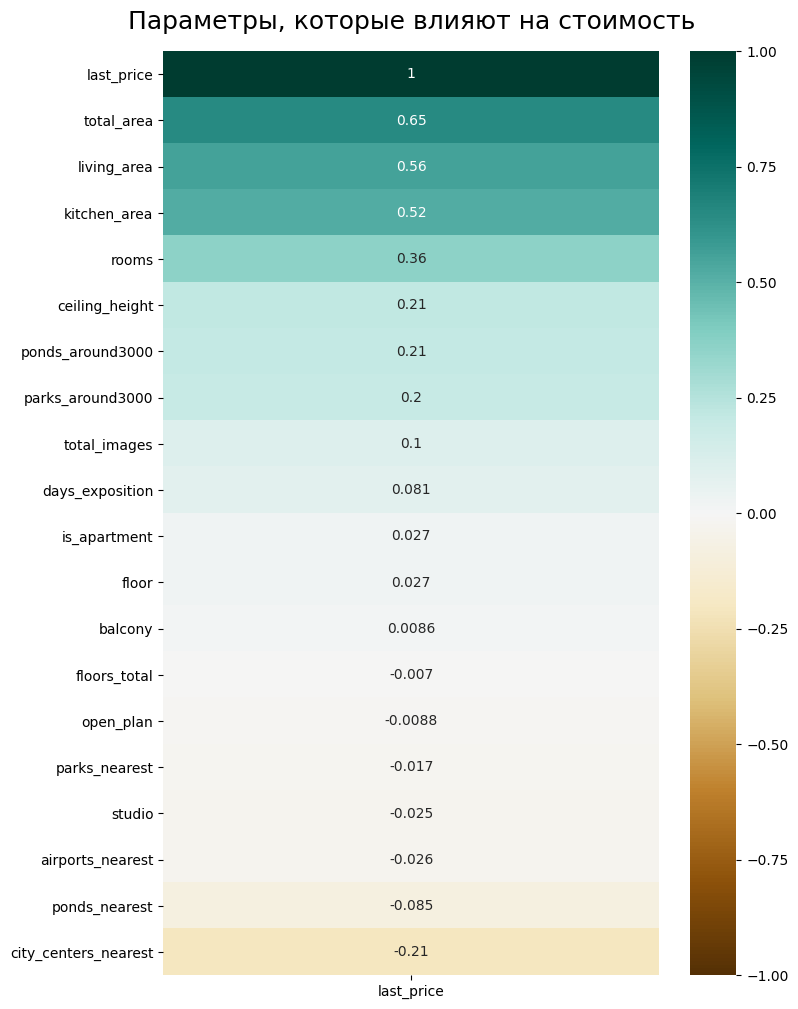

In [53]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, которые влияют на стоимость', fontdict={'fontsize':18}, pad=16);

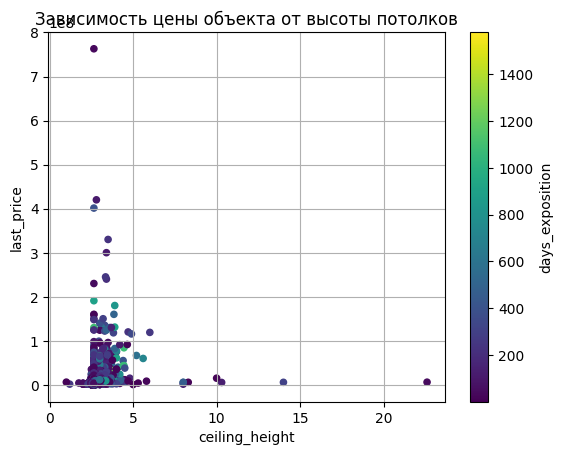

In [54]:
clean_data.plot(
    kind='scatter', 
    x='ceiling_height', 
    y='last_price', 
    c='days_exposition', 
    colormap='viridis', 
    grid=True,
    title='Зависимость цены объекта от высоты потолков')
plt.show()

Уберём значения > 5 и меньше 2х - они не повлияют на распределение

In [55]:
clean_data = clean_data[(clean_data['ceiling_height'] > 2) & (clean_data['ceiling_height'] < 5)]

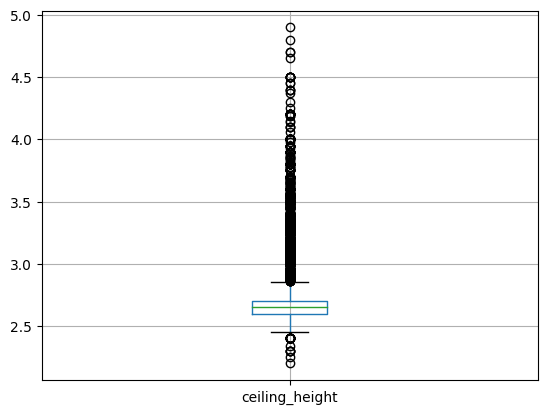

In [56]:
clean_data.boxplot(column='ceiling_height')
plt.show()

Значений, которые можно считать выбросами по-прежнему много, но мы их оставим

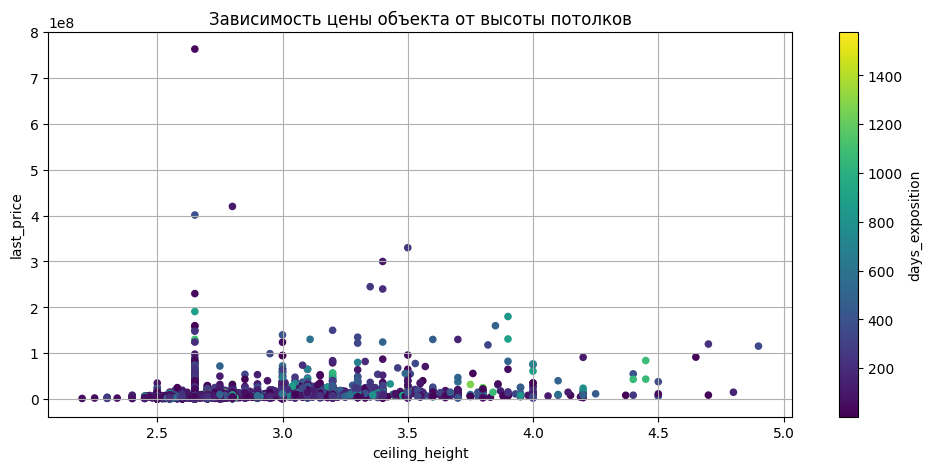

In [57]:
clean_data.plot(kind='scatter', 
                x='ceiling_height', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True, 
                title='Зависимость цены объекта от высоты потолков',
                figsize=(12,5))
plt.show()

In [58]:
# проверяем изменение корелляции после удаления выбросов
clean_data['ceiling_height'].corr(clean_data['last_price'])

0.2838292193592776

влияние увеличилось с 0.21 до 0.28 - считаем это приемлемым.

#### Количество фотографий

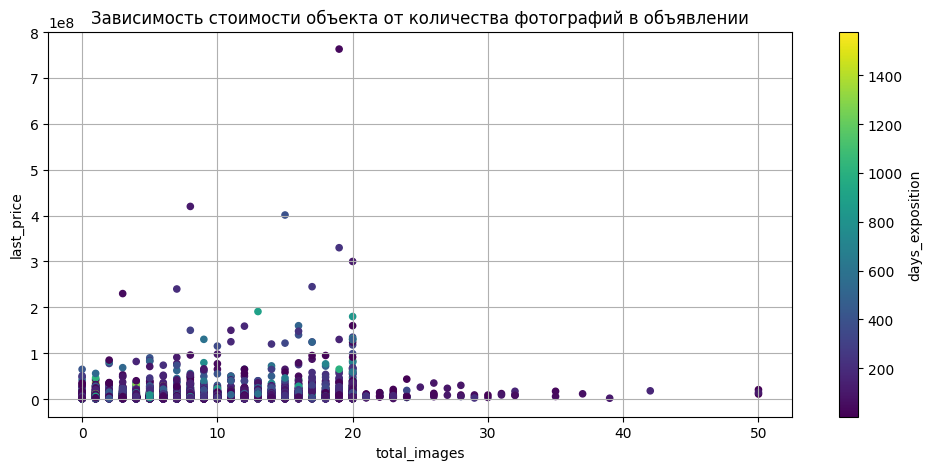

In [59]:
clean_data.plot(kind='scatter', 
                x='total_images', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True,
                figsize=(12,5),
                title='Зависимость стоимости объекта от количества фотографий в объявлении')
plt.show()

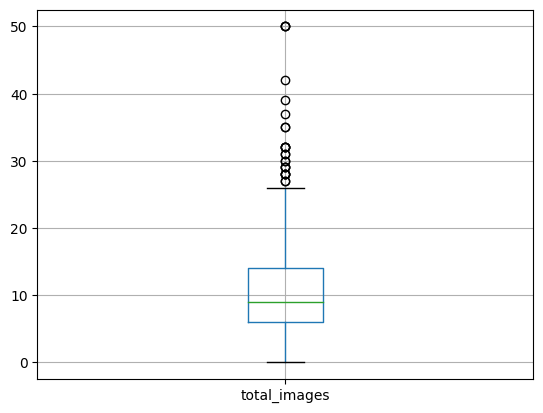

In [60]:
clean_data.boxplot(column='total_images')
plt.show()

От объявлений с количеством фотографий более 20 можно было бы избавиться, однако кажется, что они не будут использоваться в анализе - оставим как есть.

#### Общая площадь

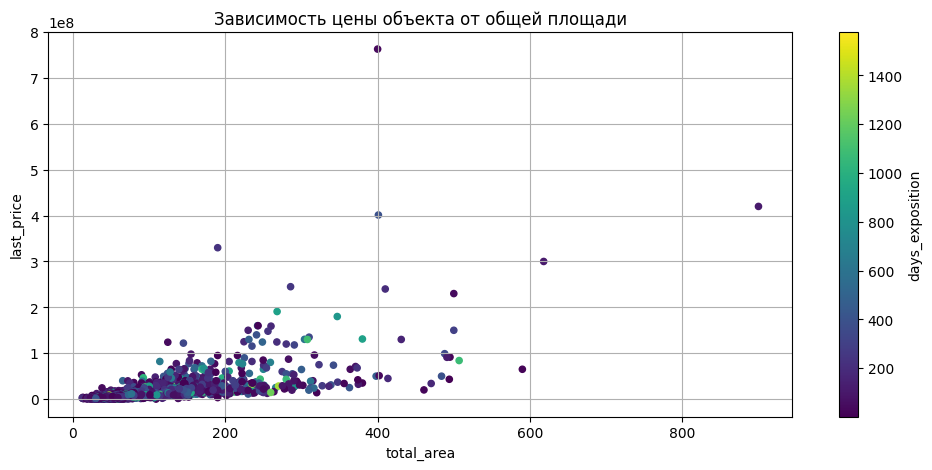

In [61]:
clean_data.plot(kind='scatter', 
                x='total_area', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True, 
                title='Зависимость цены объекта от общей площади',
                figsize=(12,5))
plt.show()

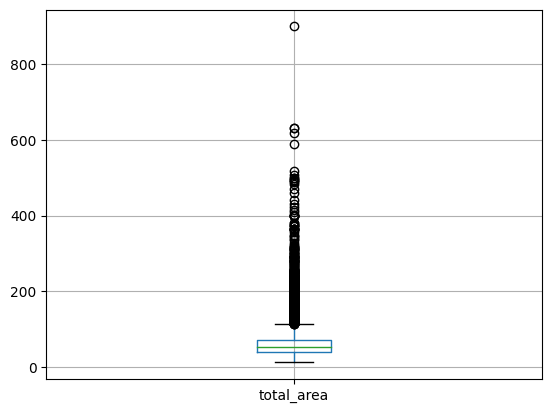

In [62]:
clean_data.boxplot(column='total_area')
plt.show()

По графикам видно, что в значениях `total_area` и `last_price` очень много высоких значений. Но квартиры действительно есть в продаже и корреляция сохраняется - просто значений меньше. Оставим их.

#### Количество комнат

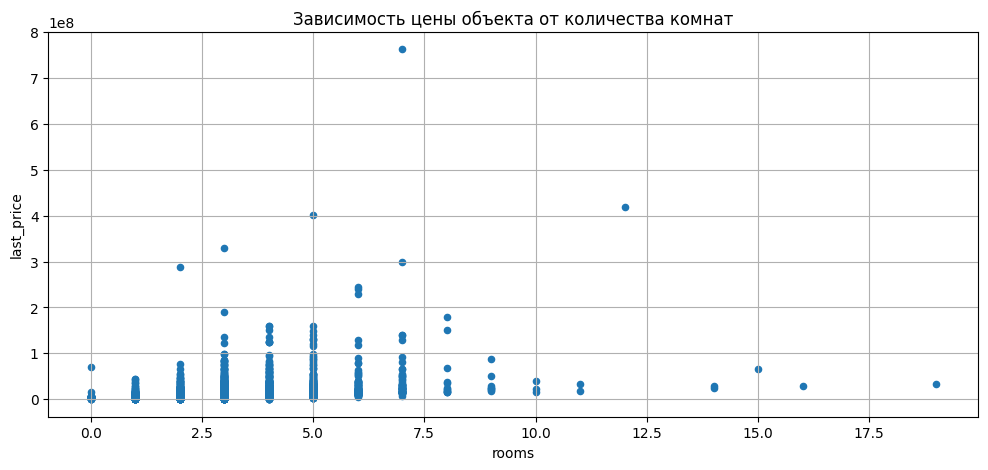

In [63]:
clean_data.plot(kind='scatter', 
                x='rooms', 
                y='last_price', 
                grid=True, 
                title='Зависимость цены объекта от количества комнат',
                figsize=(12,5))
plt.show()

In [64]:
clean_data[clean_data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,"2,450,000.0",27.0,2017-03-30,0,2.6,24.0,15.5,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
349,4,"2,320,000.0",25.0,2017-09-27,0,2.6,14.0,17.0,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0
440,8,"2,480,000.0",27.1,2018-03-12,0,2.6,17.0,24.8,4,False,True,False,NaN,2.0,Санкт-Петербург,"38,171.0","15,015.0",0.0,NaN,2.0,982.0,64.0
508,0,"3,375,000.0",34.4,2017-03-28,0,2.6,26.0,24.3,19,False,False,True,NaN,1.0,посёлок Парголово,"53,115.0","19,292.0",0.0,NaN,1.0,593.0,430.0
608,2,"1,850,000.0",25.0,2019-02-20,0,2.6,10.0,18.0,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,"3,200,000.0",26.0,2017-09-01,0,2.6,25.0,18.0,16,False,True,False,NaN,0.0,Санкт-Петербург,"11,405.0","13,222.0",0.0,NaN,1.0,623.0,14.0
23442,0,"2,500,000.0",27.7,2017-09-28,0,2.6,24.0,18.0,4,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,4.0
23554,15,"3,350,000.0",26.0,2018-09-07,0,2.6,19.0,18.0,8,False,True,False,NaN,0.0,Санкт-Петербург,"18,090.0","17,092.0",0.0,NaN,2.0,112.0,31.0
23592,10,"1,450,000.0",29.0,2017-11-11,0,2.6,9.0,18.0,8,False,False,True,NaN,2.0,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,82.0


0 комнат указывают для студий и открытой планировки, со значениями всё в порядке

#### Общее количество этажей

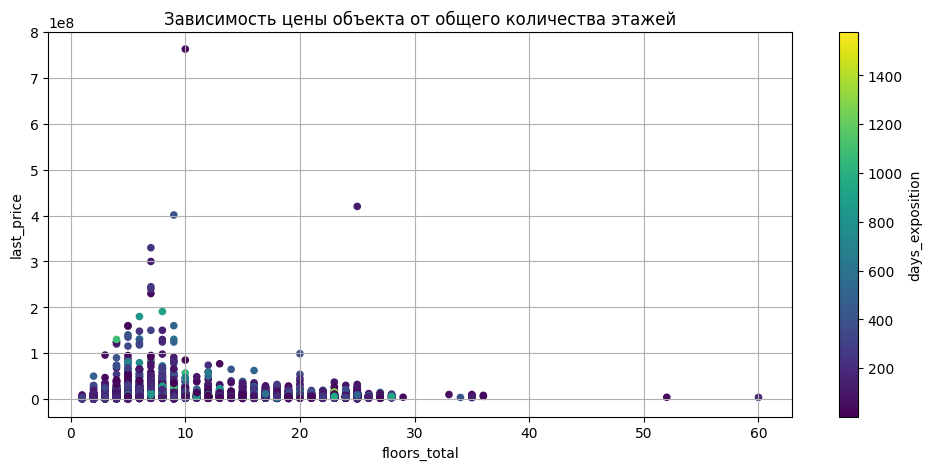

In [65]:
clean_data.plot(kind='scatter', 
                x='floors_total', 
                y='last_price', 
                c='days_exposition', 
                colormap='viridis', 
                grid=True,
                title='Зависимость цены объекта от общего количества этажей',
                figsize=(12,5))
plt.show()

In [66]:
clean_data[clean_data['floors_total'] > 30].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,"5,990,000.0",54.0,2018-03-22,2,2.6,36.0,21.4,28,False,False,False,18.7,1.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,11.0
871,14,"7,777,777.0",75.0,2017-11-16,2,2.6,35.0,40.5,23,False,False,False,11.7,0.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,169.0
1060,10,"5,200,000.0",50.0,2015-11-06,2,2.6,35.0,39.0,15,False,False,False,20.5,2.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,281.0
1697,11,"3,550,000.0",28.0,2018-02-08,1,2.6,34.0,18.0,23,False,False,False,NaN,0.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,410.0
1917,13,"10,150,000.0",74.0,2017-11-17,2,2.8,35.0,34.4,30,False,False,False,13.0,0.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,NaN


In [67]:
clean_data = clean_data[clean_data['floors_total'] < 30]

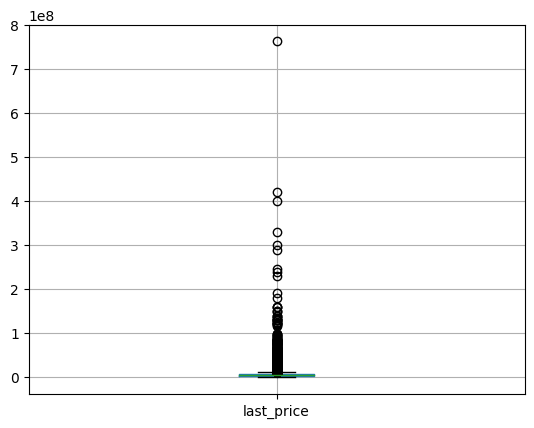

In [68]:
clean_data.boxplot(column='last_price')
plt.show()

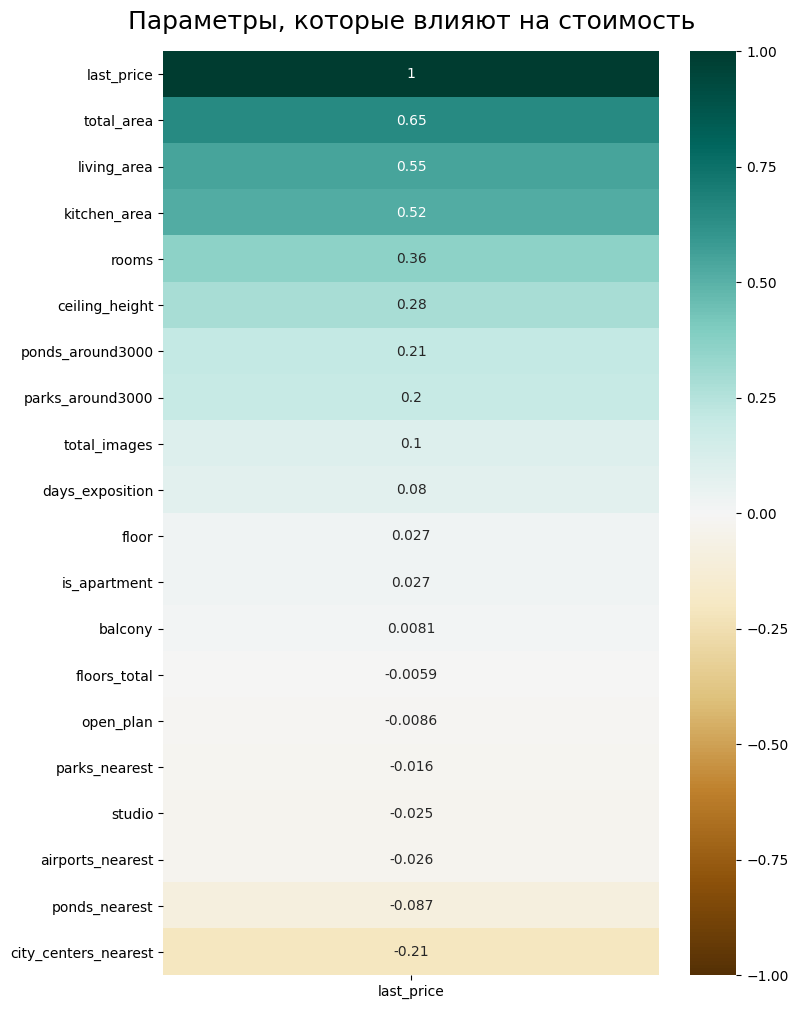

In [69]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, которые влияют на стоимость', fontdict={'fontsize':18}, pad=16);

### Промежуточный вывод:

Мы обработали явные выбросы и аномалии в данных - редкие значения отбросили, а аномальные постарались привести к исходным или таким, которые не влияют на искажение исследования.
Влияние параметров на цену объекта изменилось численно, но порядок основных не поменялся - их можно продолжать исследовать

## Новые данные и категории

Добавим новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из *м* в *км* и округлите до целых значений).

In [70]:
# добавляем цену квадратного метра
clean_data['meter_price'] = clean_data['last_price']/clean_data['total_area']
# добавляем столбцы с данными о времени публикации объявления
clean_data['first_day_exposition_weekday'] = clean_data['first_day_exposition'].dt.weekday
clean_data['first_day_exposition_month'] = clean_data['first_day_exposition'].dt.month
clean_data['first_day_exposition_year'] = clean_data['first_day_exposition'].dt.year
# добавляем расстояние до центра города в километрах
clean_data['city_centers_nearest_km'] = round(clean_data['city_centers_nearest']/1000)

/var/folders/w7/t_xj646x7tv77ld464s7_bc9hz9bp4/T/ipykernel_14918/150705921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['meter_price'] = clean_data['last_price']/clean_data['total_area']
/var/folders/w7/t_xj646x7tv77ld464s7_bc9hz9bp4/T/ipykernel_14918/150705921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['first_day_exposition_weekday'] = clean_data['first_day_exposition'].dt.weekday
/var/folders/w7/t_xj646x7tv77ld464s7_bc9hz9bp4/T/ipykernel_14918/150705921.py:5: SettingW

In [71]:
def floor_category(row):
    """
    Возвращает категорию по значению этажа floor, используя правила:
    - 'первый', если floor == 1;
    - 'последний', если floor равен общему количеству этажей floors_total;
    - 'другой', если floor не 1 и не равен общему количеству этажей floors_total
    """
    
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] > row['floors_total']:
        return 'ошибка'
    return 'другой' 



In [72]:
clean_data['floor_category'] = clean_data.apply(floor_category, axis=1)

#проверим переименование
clean_data.head()

/var/folders/w7/t_xj646x7tv77ld464s7_bc9hz9bp4/T/ipykernel_14918/1927568166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['floor_category'] = clean_data.apply(floor_category, axis=1)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,city_centers_nearest_km,floor_category
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019,16.0,другой
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018,19.0,первый
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015,14.0,другой
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,False,False,False,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1",4,7,2015,7.0,другой
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018,8.0,другой


In [73]:
clean_data['floor_category'].value_counts()

другой       17315
последний     3327
первый        2909
Name: floor_category, dtype: int64

## Исследовательский анализ данных

1. Изучим следующие параметры объектов:

    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.

### общая площадь

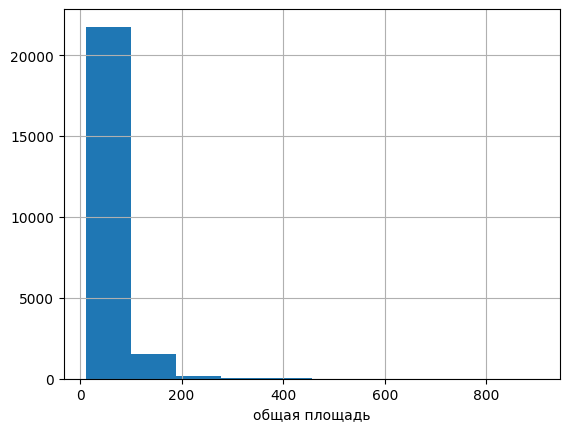

In [74]:
ax = clean_data['total_area'].hist()
ax.set_xlabel('общая площадь')
plt.show()

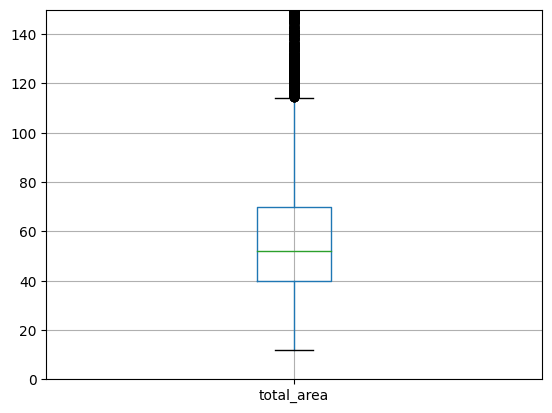

In [75]:
clean_data.boxplot(column='total_area')
plt.ylim(0,150)
plt.show()

In [76]:
clean_data['total_area'].describe()

count   23,551.0
mean        60.3
std         35.5
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64

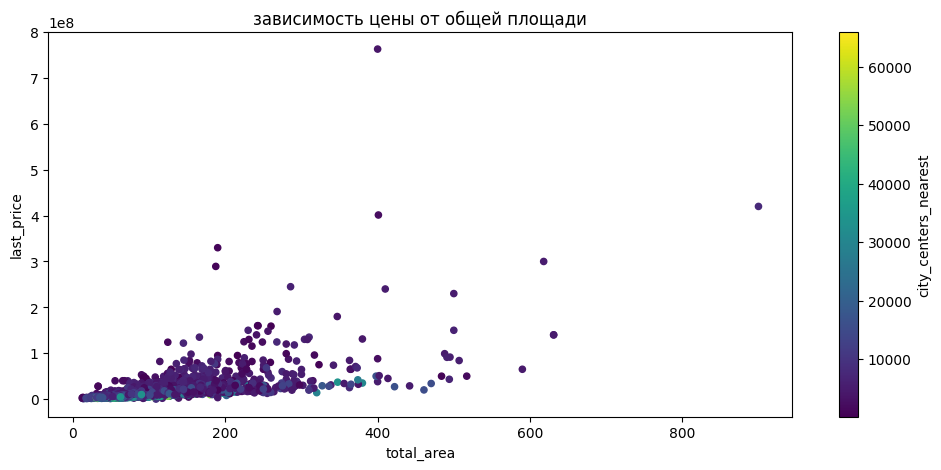

In [77]:
clean_data.plot(kind='scatter', 
                x='total_area', 
                y='last_price', 
                c='city_centers_nearest', 
                colormap='viridis',
                figsize=(12,5),
                title='зависимость цены от общей площади')
plt.show()

Большая часть объектов имеет площадь от 12 до 110 квадратных метров. Большие объекты статистически можно считать выбросами, однако такие объекты существуют и вполне поддаются описанию "чем больше, тем дороже"

### жилая площадь

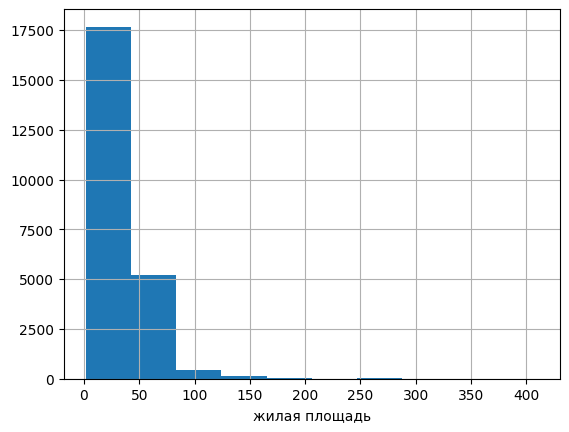

In [78]:
ax = clean_data['living_area'].hist()
ax.set_xlabel('жилая площадь')
plt.show()

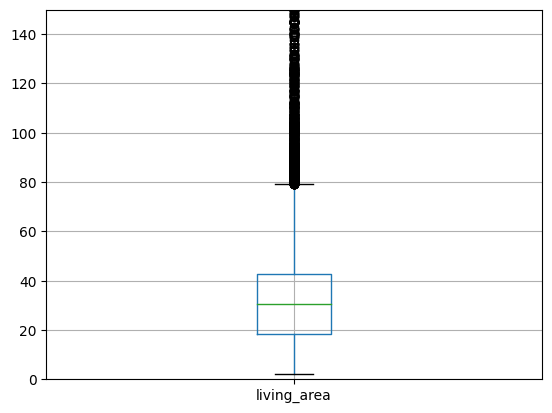

In [79]:
clean_data.boxplot(column='living_area')
plt.ylim(0,150)
plt.show()

In [80]:
clean_data['living_area'].corr(clean_data['total_area'])

0.9100908518062166

In [81]:
clean_data['living_area'].describe()

count   23,551.0
mean        34.3
std         21.7
min          2.0
25%         18.4
50%         30.3
75%         42.7
max        409.7
Name: living_area, dtype: float64

In [82]:
clean_data[clean_data['living_area'] < 12]['living_area'].count()

127

Жилая площадь ожидаемо кореллирует с общей площадью. Большая часть объектов имеет жилую площадь до 80 квадратных метров. Есть 127 квартир с указанной жилой площадью менее нормы - "Норма квадратных метров на человека составляет 12"

### площадь кухни (были пропуски)

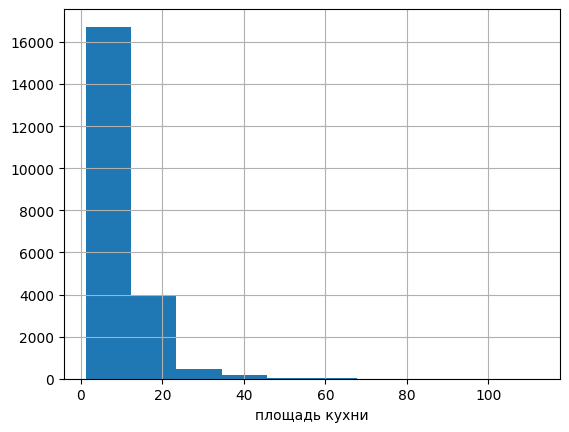

In [83]:
ax = clean_data['kitchen_area'].hist()
ax.set_xlabel('площадь кухни')
plt.show()

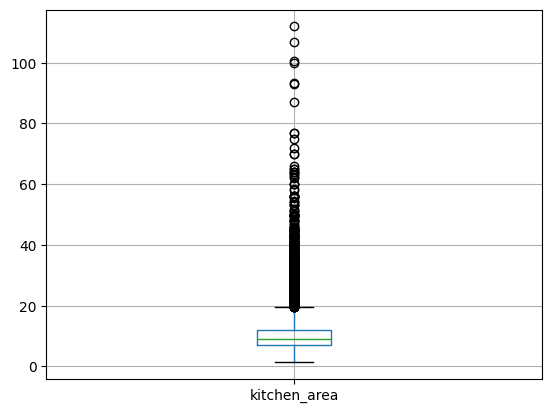

In [84]:
clean_data.boxplot(column='kitchen_area')
plt.show()

In [85]:
clean_data['kitchen_area'].corr(clean_data['living_area'])

0.4224541146807162

In [86]:
clean_data['kitchen_area'].describe()

count   21,331.0
mean        10.6
std          5.9
min          1.3
25%          7.0
50%          9.1
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

In [87]:
# квартиры с очень маленькими кухнями
clean_data[clean_data['kitchen_area'] < 5]['kitchen_area'].count()

104

Площадь кухни слабо кореллирует с общей и жилой площадью. Однако, это может быть результатом большого количества пустых значений.

### цена объекта

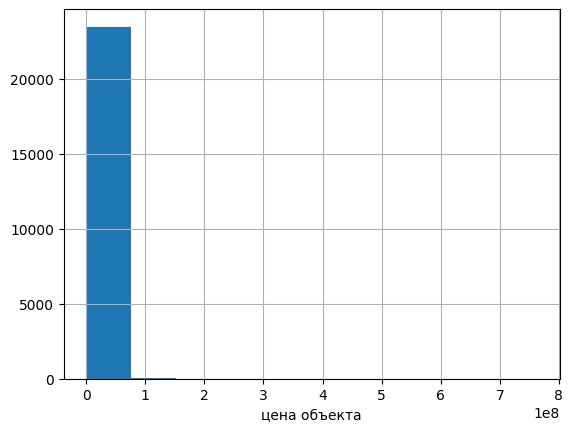

In [88]:
ax = clean_data['last_price'].hist()
ax.set_xlabel('цена объекта')
plt.show()

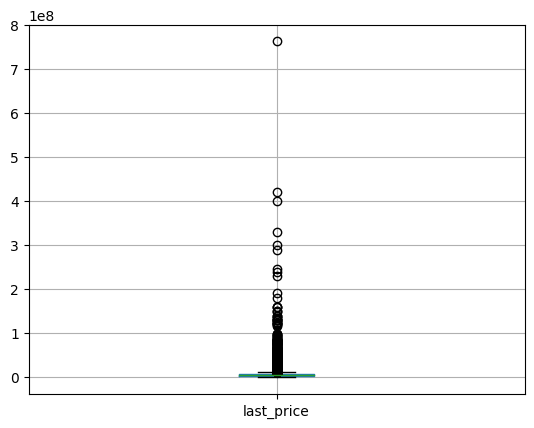

In [89]:
clean_data.boxplot(column='last_price')
plt.show()

In [90]:
clean_data['last_price'].describe()

count        23,551.0
mean      6,525,358.4
std      10,832,787.2
min          12,190.0
25%       3,400,000.0
50%       4,644,000.0
75%       6,790,000.0
max     763,000,000.0
Name: last_price, dtype: float64

Большая часть объектов торгуется в диапазоне до 10 000 000, однако есть и очень дорогие лоты, и подозрительно дешёвые (12 190р)

### количество комнат

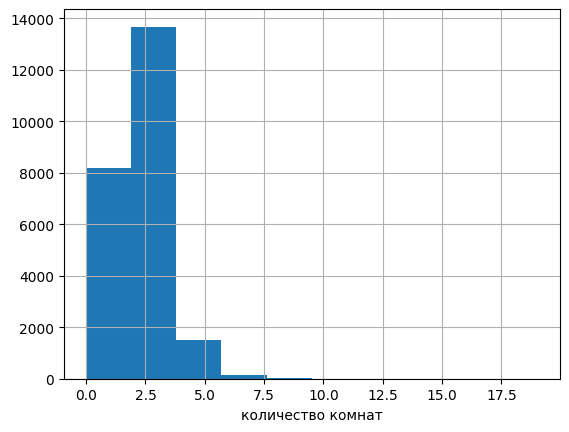

In [91]:
ax = clean_data['rooms'].hist()
ax.set_xlabel('количество комнат')
plt.show()

In [92]:
clean_data['rooms'].describe()

count   23,551.0
mean         2.1
std          1.1
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

Ожидаемо, наиболее часто встречаются среди объявлений 1,2 и 3х комнатные квартиры

### высота потолков (добавлены медианные значения)

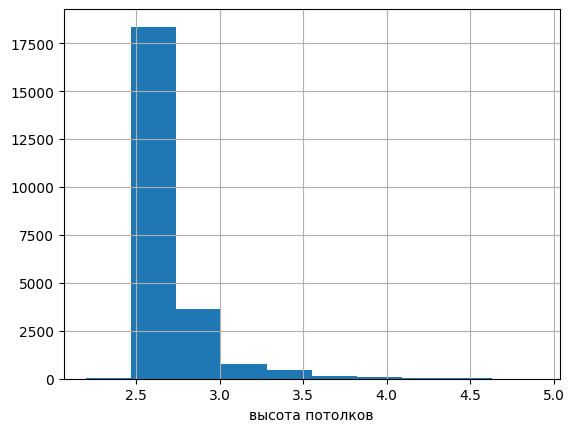

In [93]:
ax = clean_data['ceiling_height'].hist()
ax.set_xlabel('высота потолков')
plt.show()

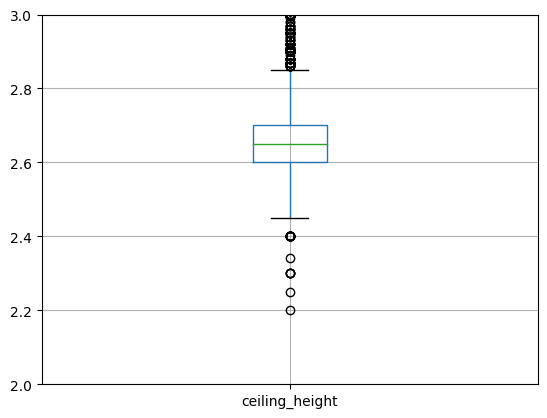

In [94]:
ax = clean_data.boxplot(column='ceiling_height')
ax.set_ylim(2,3)
plt.show()

In [95]:
clean_data['ceiling_height'].describe()

count   23,551.0
mean         2.7
std          0.2
min          2.2
25%          2.6
50%          2.6
75%          2.7
max          4.9
Name: ceiling_height, dtype: float64

##### Вывод
Мы исправляли аномальные значения и удаляли слишком малые и слишком большие (для целей исследования). Также мы меняли все пропуски на медиану, поэтому сейчас в выборке оказались большинство значений 2.7м с небольшим разбросом.Часть объявлений о квартирах с более высокими потолками (до 5 м ) тоже осталась в выборке.

### этаж квартиры
    

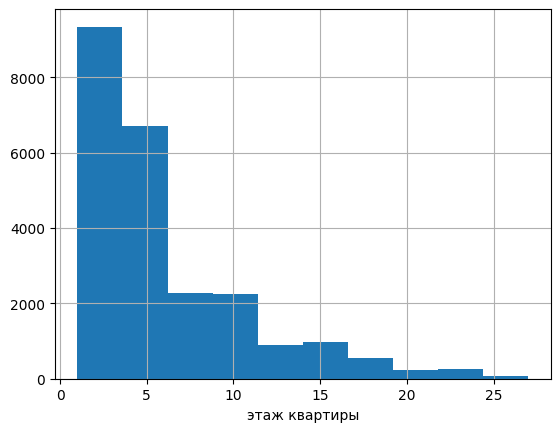

In [96]:
ax = clean_data['floor'].hist()
ax.set_xlabel('этаж квартиры')
plt.show()

In [97]:
clean_data['floor'].describe()

count   23,551.0
mean         5.9
std          4.8
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         27.0
Name: floor, dtype: float64

##### Вывод
Больше всего квартир - до 5го этажа. Для России это кажется логично, учитывая наиболее распространённые типы домов. Межквартильный размах как раз закрывает пяти и девятиэтажки

### тип этажа квартиры («первый», «последний», «другой»)

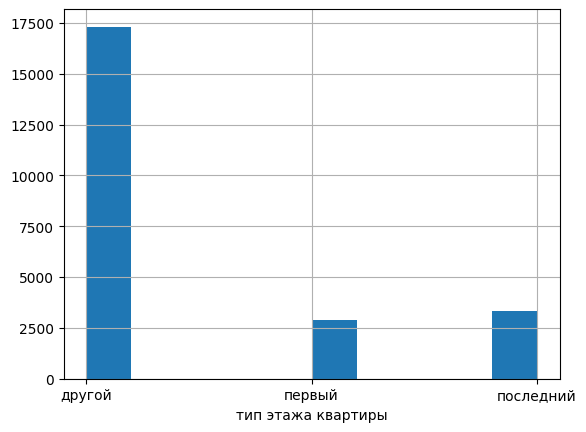

In [98]:
ax = clean_data['floor_category'].hist()
ax.set_xlabel('тип этажа квартиры')
plt.show()

In [99]:
clean_data['floor_category'].describe()

count      23551
unique         3
top       другой
freq       17315
Name: floor_category, dtype: object

##### Вывод
Первые и последние этажи занимают значительную долю в выборке (26%). Есть гипотезы, что стоимость квартир на таких этажах ниже аналогов на других этажах. Проверим это далее в исследовании.

### общее количество этажей в доме;


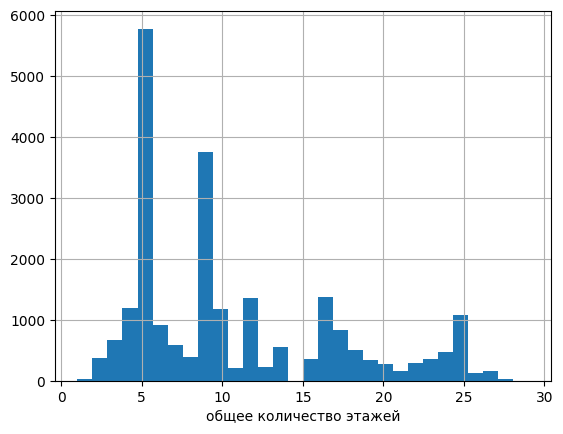

In [100]:
ax = clean_data['floors_total'].hist(bins=30)
ax.set_xlabel('общее количество этажей')
plt.show()

In [101]:
clean_data['floors_total'].describe()

count   23,551.0
mean        10.6
std          6.5
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         29.0
Name: floors_total, dtype: float64

пики, возможно, связаны с типовыми домами (5, 9, 12, 16, 25)

### расстояние до центра города в метрах (есть пропуски)


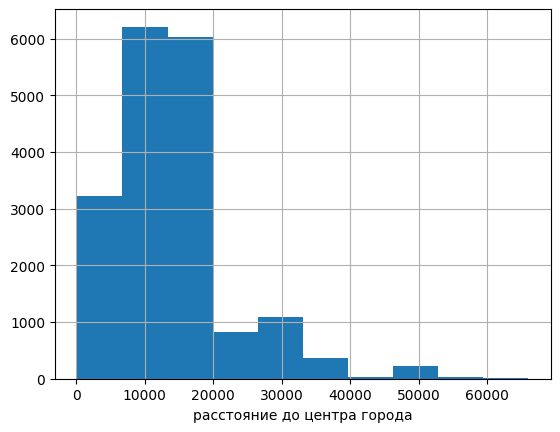

In [102]:
ax = clean_data['city_centers_nearest'].hist()
ax.set_xlabel('расстояние до центра города')
plt.show()

In [103]:
clean_data['city_centers_nearest'].describe()

count   18,053.0
mean    14,176.2
std      8,615.1
min        181.0
25%      9,229.0
50%     13,083.0
75%     16,270.0
max     65,968.0
Name: city_centers_nearest, dtype: float64

##### Вывод
Большая часть квартир - в радиусе 20км от центра города. Минимальное значение - 181 метр, но около центра квартир продаётся меньше, чем в радусе 10-20 км (это, скорее всего "спальники")

### расстояние до ближайшего аэропорта (есть пропуски)


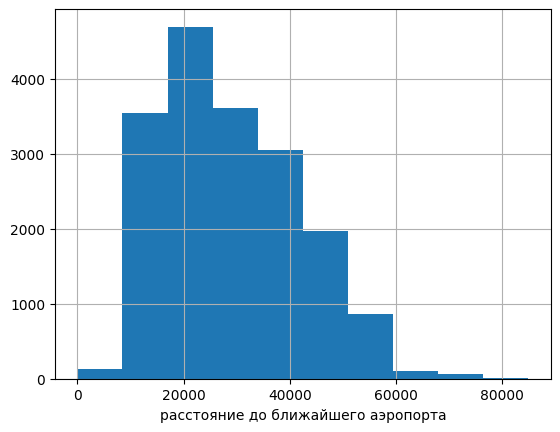

In [104]:
ax = clean_data['airports_nearest'].hist()
ax.set_xlabel('расстояние до ближайшего аэропорта')
plt.show()

In [105]:
clean_data['airports_nearest'].describe()

count   18,030.0
mean    28,805.6
std     12,631.5
min          0.0
25%     18,557.0
50%     26,760.5
75%     37,274.5
max     84,869.0
Name: airports_nearest, dtype: float64

In [106]:
clean_data[clean_data['airports_nearest'] < 10000]['airports_nearest'].count()

302

##### Вывод
Минимальное значение - 0, однако в целом рядом с аэропортом квартир очень мало - 302 предложения в радиусе 10км. Большая часть объявлений - в радиусе 20-40км от аэропорта

### расстояние до ближайшего парка (есть пропуски)

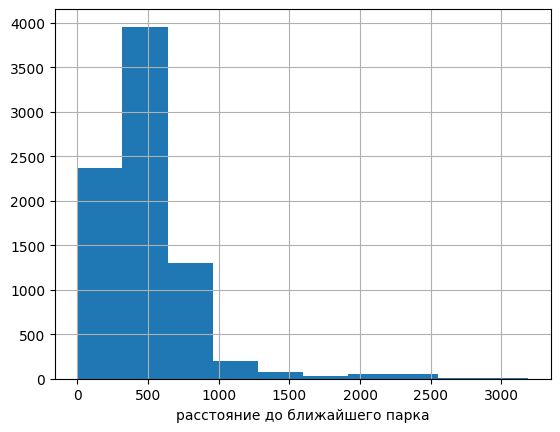

In [107]:
ax = clean_data['parks_nearest'].hist()
ax.set_xlabel('расстояние до ближайшего парка')
plt.show()

In [108]:
clean_data['parks_nearest'].describe()

count   8,028.0
mean      490.6
std       341.6
min         1.0
25%       288.0
50%       455.0
75%       612.0
max     3,190.0
Name: parks_nearest, dtype: float64

##### Вывод
Достаточно большое количество квартир имеют парк неподалёку. Большая часть - в пределах 300 - 600м. Если парк указан как "рядом", то он редко далее 1км.

### день и месяц публикации объявления

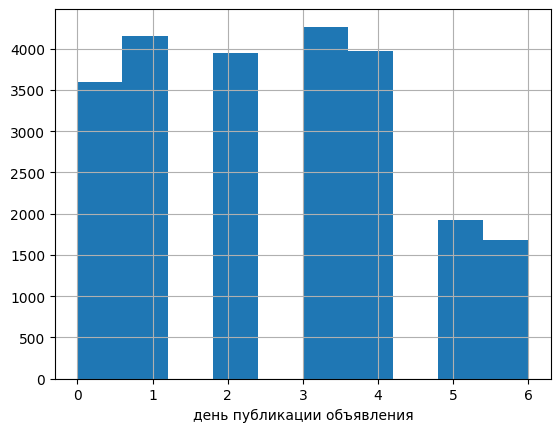

In [109]:
ax = clean_data['first_day_exposition_weekday'].hist()
ax.set_xlabel('день публикации объявления')
plt.show()

In [110]:
clean_data['first_day_exposition_weekday'].describe()

count   23,551.0
mean         2.6
std          1.8
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: first_day_exposition_weekday, dtype: float64

по выходным объявлений публикуется значительно меньше

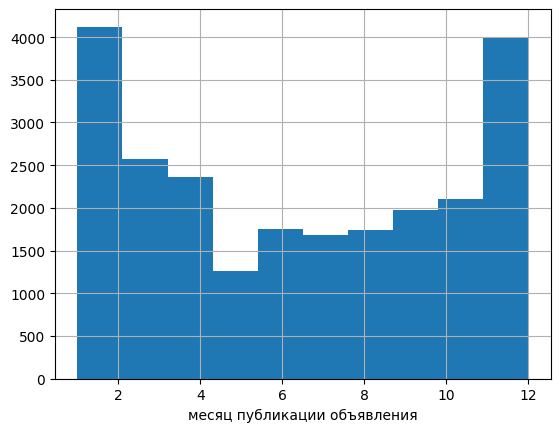

In [111]:
ax = clean_data['first_day_exposition_month'].hist()
ax.set_xlabel('месяц публикации объявления')
plt.show()

In [112]:
clean_data['first_day_exposition_month'].describe()

count   23,551.0
mean         6.4
std          3.5
min          1.0
25%          3.0
50%          6.0
75%         10.0
max         12.0
Name: first_day_exposition_month, dtype: float64

##### Вывод
Декабрь и январь - лидеры по количеству опубликовынных объявлений. В мае наоборот, объявлений значительно меньше. По остальным месяцам выборка более-менее равномерная

2. Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.

- Пострим гистограмму.
- Посчитаем среднее и медиану.

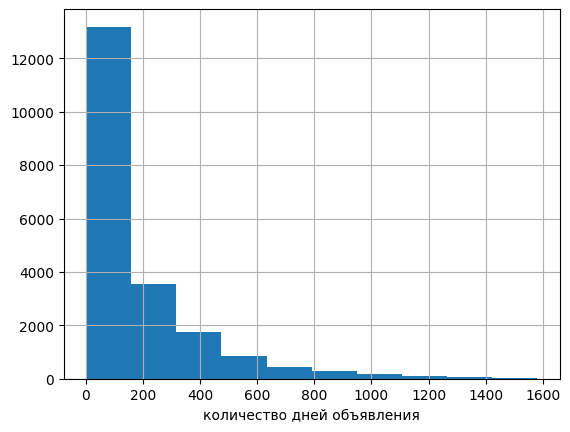

In [113]:
ax = clean_data['days_exposition'].hist()
ax.set_xlabel('количество дней объявления')
plt.show()

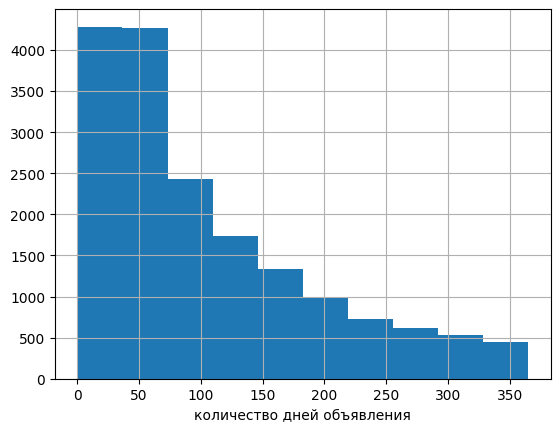

In [114]:
ax = clean_data['days_exposition'].hist(range=(0,365))
ax.set_xlabel('количество дней объявления')
plt.show()

Большая часть квартир продаётся за первые два месяца, затем график плавно спадает

In [115]:
clean_data['days_exposition'].describe()

count   20,392.0
mean       180.9
std        219.8
min          1.0
25%         45.0
50%         95.0
75%        232.0
max      1,580.0
Name: days_exposition, dtype: float64

Продажи в течение месяца можно считать быстрыми, а то, что не продаётся в течение года и более - необычайно долго.

3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    
    Изучите, зависит ли цена от:
    
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
        
        Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

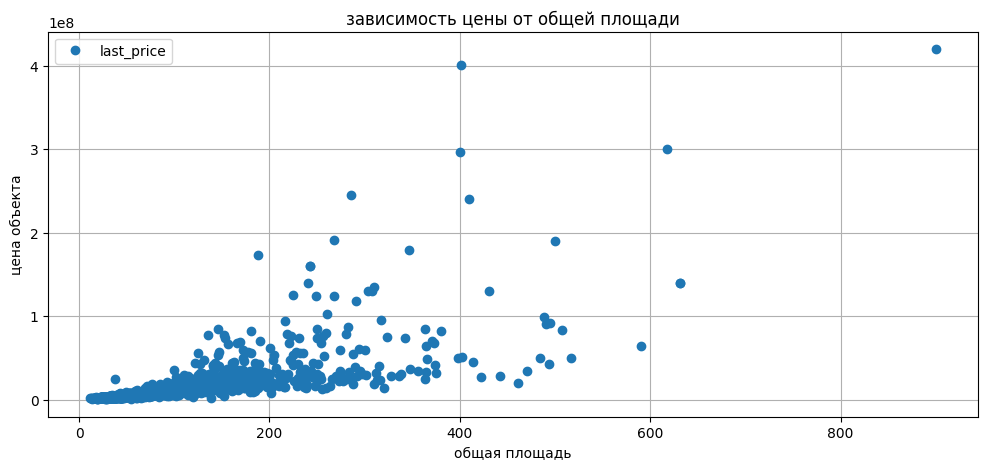

In [116]:
ax = clean_data.pivot_table(index='total_area', 
                       values='last_price', 
                       aggfunc='mean').plot(grid=True, figsize=(12, 5), title='зависимость цены от общей площади', style='o')
ax.set_xlabel('общая площадь')
ax.set_ylabel('цена объекта')
plt.show()

Цена зависит от общей площади объекта, тренд определённо в том, что больший по площади объект будет стоить дороже. Однако большие объекты схожие по площади могут очень сильно отличаться по цене. 

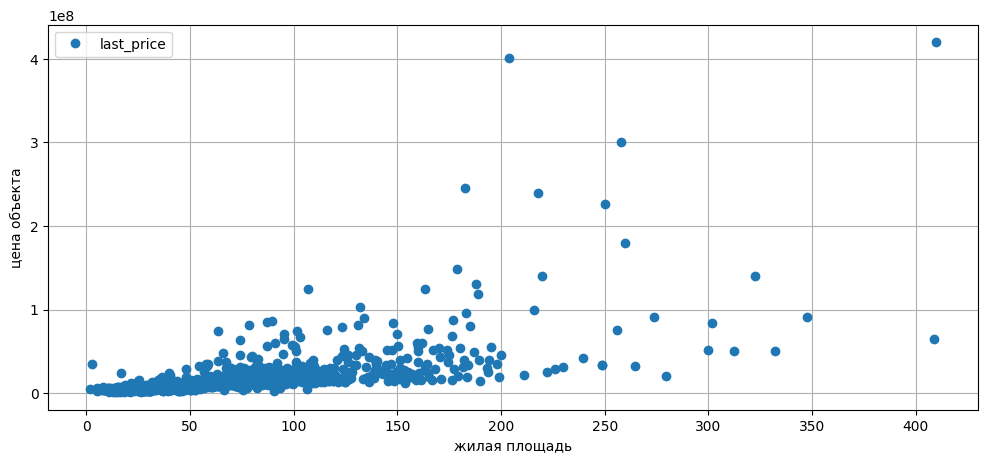

In [117]:
ax = clean_data.pivot_table(index='living_area', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5), style='o')
ax.set_xlabel('жилая площадь')
ax.set_ylabel('цена объекта')
plt.show()

тренд также виден, однако, разброс у близких значений очень высокий

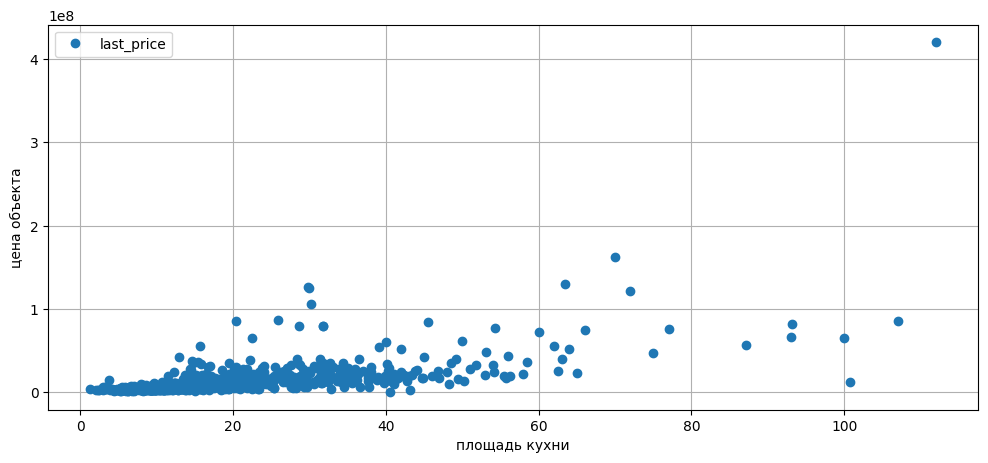

In [118]:
ax = clean_data.pivot_table(index='kitchen_area', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5), style='o')
ax.set_xlabel('площадь кухни')
ax.set_ylabel('цена объекта')
plt.show()

Из трёх видов площадей с ценой лучше всего кореллирует общая площадь

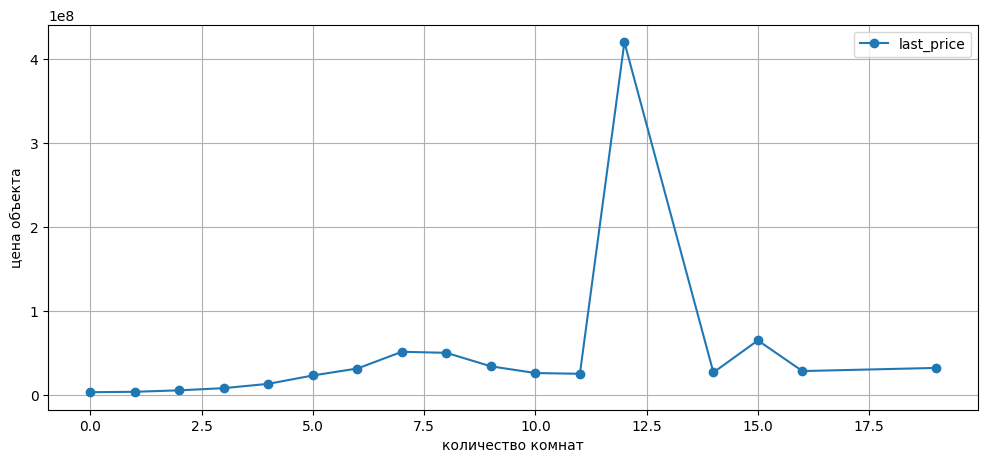

In [119]:
ax = clean_data.pivot_table(index='rooms', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5), style='o-')
ax.set_xlabel('количество комнат')
ax.set_ylabel('цена объекта')
plt.show()

Количество комнат может являться параметром ценообразования - чем больше комнат, тем выше средняя цена объекта

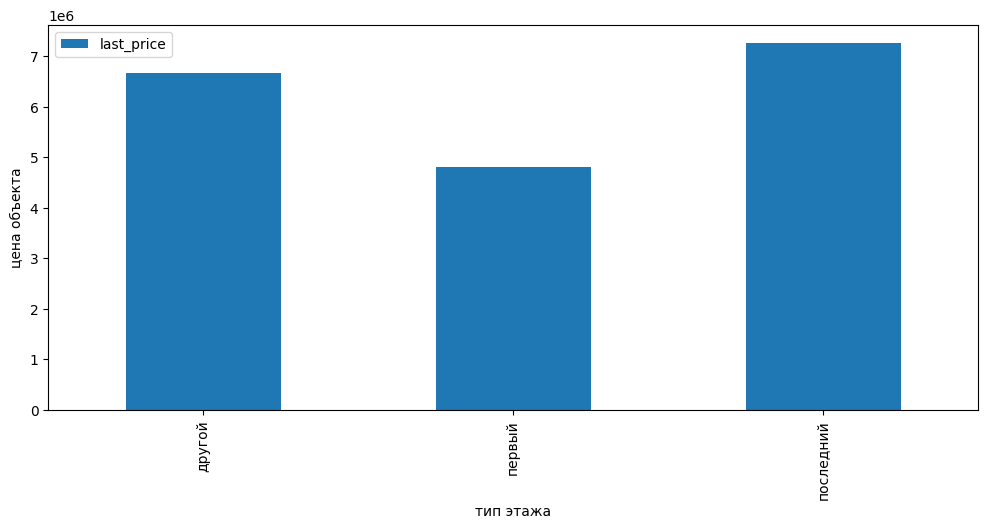

In [120]:
ax = clean_data.pivot_table(index='floor_category', 
                            values='last_price', 
                            aggfunc='mean').plot(figsize=(12, 5), kind='bar')
ax.set_xlabel('тип этажа')
ax.set_ylabel('цена объекта')
plt.show()

Первый и последний этажи - не в фаворе. Они уменьшают среднюю стоимость объекта.

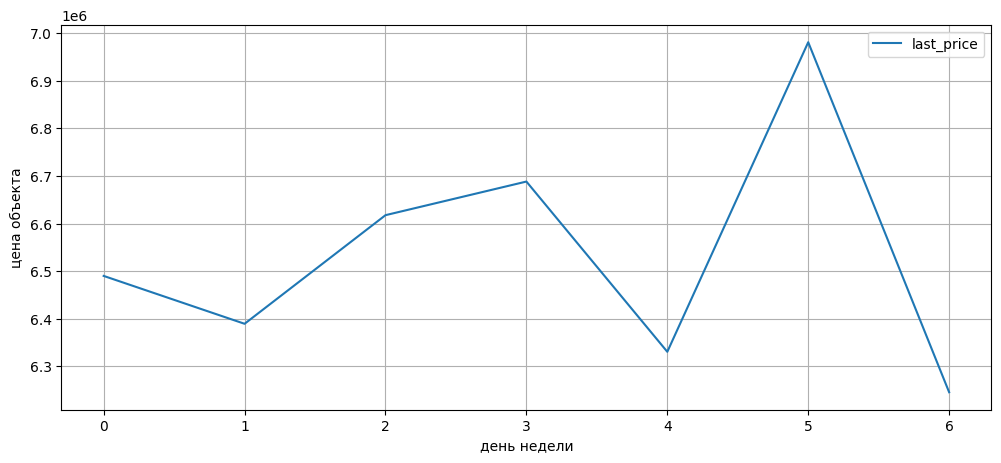

In [121]:
ax = clean_data.pivot_table(index='first_day_exposition_weekday', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_xlabel('день недели')
ax.set_ylabel('цена объекта')
plt.show()

Ближе к концу недели выкладываются более дешёвые предложения

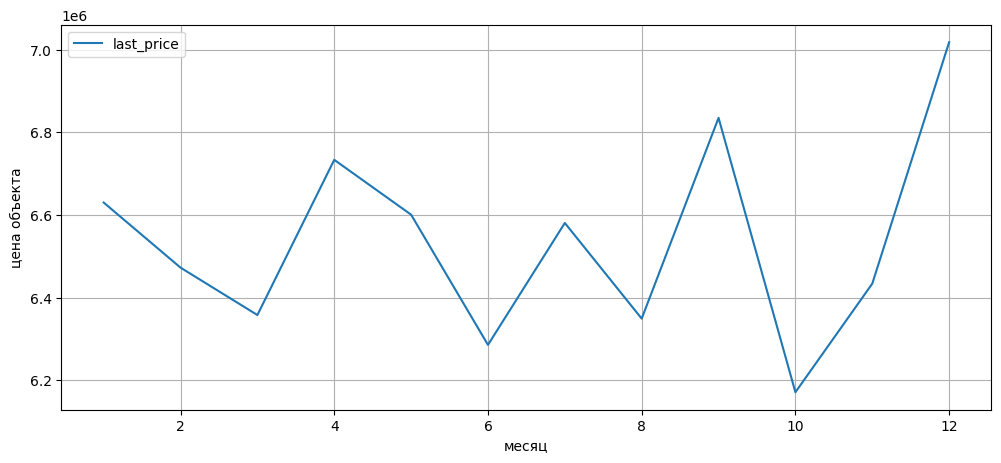

In [122]:
ax = clean_data.pivot_table(index='first_day_exposition_month', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_xlabel('месяц')
ax.set_ylabel('цена объекта')
plt.show()

в начале и конце года цены самые высокие, также летом есть подъём

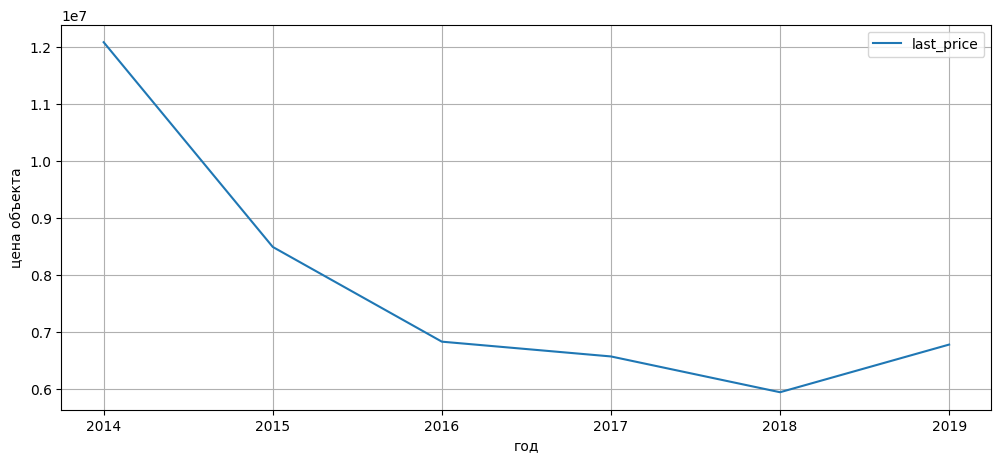

In [123]:
ax = clean_data.pivot_table(index='first_day_exposition_year', 
                            values='last_price', 
                            aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_xlabel('год')
ax.set_ylabel('цена объекта')
plt.show()

цены снижались с течением лет, но в 2019м наметился тренд на повышение

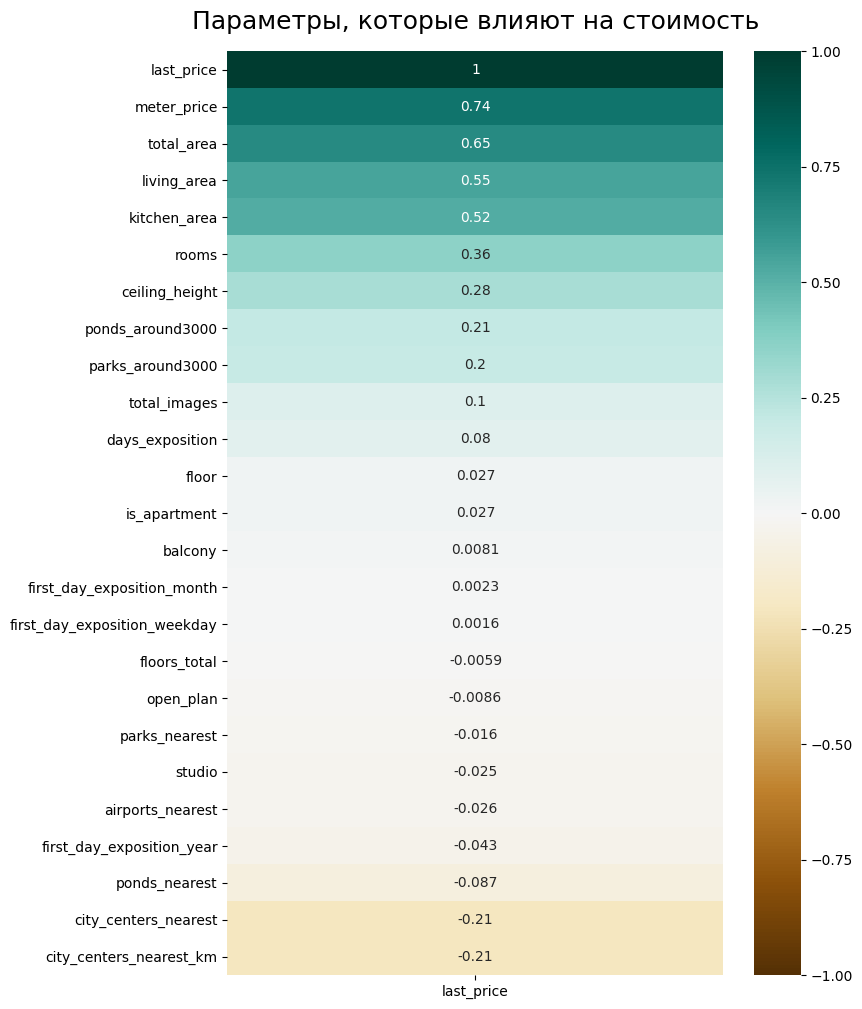

In [124]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, которые влияют на стоимость', fontdict={'fontsize':18}, pad=16);

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [125]:
big_places = clean_data.groupby('locality_name').count().sort_values(by='meter_price', ascending=False)
big_places = big_places[:10]

clean_data[clean_data['locality_name'].isin(big_places.index)].pivot_table(index='locality_name', values='meter_price', aggfunc='mean').sort_values(by='meter_price')

,meter_price
locality_name,
Выборг,"58,238.1"
Всеволожск,"68,719.3"
Гатчина,"68,746.1"
Колпино,"75,424.6"
посёлок Шушары,"78,551.3"
посёлок Мурино,"85,629.6"
посёлок Парголово,"90,175.9"
деревня Кудрово,"92,473.5"
Пушкин,"103,125.8"


Наиболее дорогой квадратный метр - ожидаемо в Санкт-Петербурге. Наиболее дешёвый - в Выборге.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделм квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

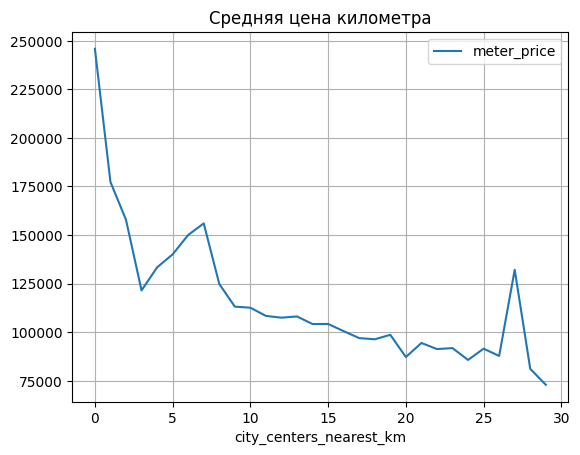

In [126]:
ax = (
        clean_data[clean_data['locality_name'] == 'Санкт-Петербург']
        .pivot_table(index='city_centers_nearest_km', values='meter_price', aggfunc='mean')
        .plot(grid=True, title='Средняя цена километра')
    )
plt.show()

Чем дальше от центра, тем ниже средняя цена за метр кадратный. График резко идёт вверх при приближении к центру от 4х километров. Есть аномальный выброс на 26 км от центра.

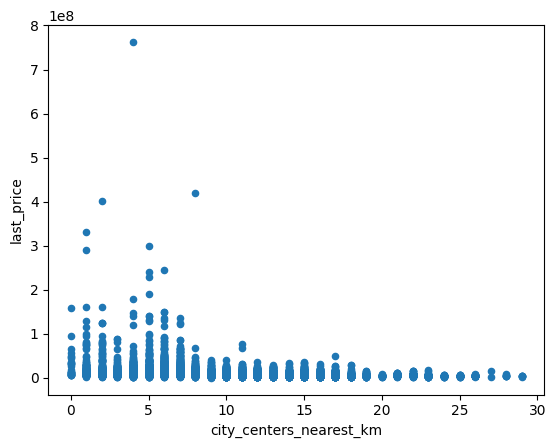

In [127]:
ax = (
    clean_data[clean_data['locality_name'] == 'Санкт-Петербург']
    .plot(kind='scatter', x='city_centers_nearest_km', y='last_price')
)
plt.show()

## Общий вывод

#### Краткий обзор проведённой работы. 
В приведённом исследовании стояла задача изучить данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет и установить параметры, помогающие определить рыночную стоимость квартир.

В первой части мы готовили данные для исследования:
- Мы обнаружили достаточно большое количество пропусков в некоторых параметрах.
что сделали:
  - приняли высоту потолков за среднюю там, где они не были указаны
  - удалили строки, в которых не указана высота дома (всего этажей), так как их было очень мало
  - если не указано количество балконов - приняли за 0
  - если не указано название населённого пункта - указали `'unknown'`
  - приняли жилую площадь равной средней жилой площади в аналогичных по количеству комнат квартирах там, где значения не были указаны
  - приняли 0 парков и прудов рядом, если они не указаны
  - признак апартаментов приняли False, если ничего не указано

- В данных наблюдаются редкие значения, которые смещают выборки и могут быть ошибочными, так как выходят за рамки ожидаемых распределений. 
Мы обработали явные выбросы и аномалии в данных - редкие значения отбросили, а аномальные постарались привести к исходным или таким, которые не влияют на искажение исследования.
Влияние параметров на цену объекта изменилось численно, но порядок основных не поменялся.

Также для целей исследования добавили некоторые категории и параметры.

#### Главные выводы. 
Параметры, помогающие определить рыночную стоимость квартир, можно разделить на три категории:
1. Параметры объекта
    - общая площадь - наиболее важный показатель
    - жилая площадь
    - площадь кухни
    - количество комнат
2. Расположение
  - близость парков и прудов
  - близость к центру города
  - населённый пункт
3. Время публикации
  - ближе к концу недели выкладываются более дешёвые предложения (пт, сб и вс)
  - в начале и конце года цены самые высокие (с ноября по февраль), также летом есть подъём (июль-сентябрь)

  
Продажи в течение месяца можно считать быстрыми, а то, что не продаётся в течение года и более - необычайно долго.

#### Рекомендации.
В данных достаточно много пропусков, значения для которых должны были быть получены автоматически на основе картографических данных, или вычислены на основе разницы дат.
- airports_nearest         5532
- city_centers_nearest     5509
- parks_nearest           15568
- ponds_nearest           14552
- days_exposition          3172

Эти пропуски достаточно сложно обработать, также они могут означать как то, что рядом этих объектов нет, так и то, что объекты очень близко. Заменять их на 0 значит определить их в категорию "очень близко". Рекомендуем проверить формирование этих данных и какие-то значения, помогающие определить, что этот параметр нужно игнорировать (слишком далеко/близко)

Некоторые параметры, вроде количества балконов, могут иметь значения по-умолчанию, чтобы, например, если не указано количество балконов - вариант был по-умолчанию 0, или 0 парков и прудов рядом, если они не указаны.

Есть некоторые ошибки в типах данных, которые стоило бы исправить при формировании выгрузки. Для целей исследования мы их заменили:
- `balcony` — стоит поменять тип данных на `int`
- `days_exposition` — стоит поменять тип данных на `int`
- `first_day_exposition` — дата публикации имеет строковый формат - надо поменять на `datetime`
- `floors_total` — можно поменять тип данных на `int`
- `is_apartment` — в описании указано, что это `bool`, но тут это строка
- `parks_around3000` — стоит поменять тип данных на `int`
- `ponds_around3000` — стоит поменять тип данных на `int`

Названия населённых пунктов рекомендуется делать выбором из списка, а не ручным вводом - в данных были встречены неявные дубликаты

